# Kfz-Haftpflichtversicherungsschäden-Modellierung

Autor: <a href="https://github.com/micvolk">Michael Volk</a>

## Inhaltsverzeichnis

- [Vorgehen](#Vorgehen)
- [Beschreibung der Daten](#Beschreibung-der-Daten)
- [Exploration-der-Daten](#Exploration-der-Daten)
- [Geladene Tabellen anzeigen](#Geladene-Tabellen-anzeigen)
- [Univariate-Analyse](#Univariate-Analyse)
  - [Lagemaße und Histogramme bzgl der numerischen Merkmale](#Lagemaße-und-Histogramme-bzgl-der-numerischen-Merkmale)
  - [Kennzahlen und Histogramme bzgl kategorialer Merkmale](#Kennzahlen-und-Histogramme-bzgl-kategorialer-Merkmale)
- [Marginale Schadenhäufigkeiten bzgl Merkmalen](#Marginale-Schadenhäufigkeiten-bzgl-Merkmalen)
- [Marginale Schadensbeträge bzgl Merkmalen](#Marginale-Schadensbeträge-bzgl-Merkmalen)
- [Multivariate-Analyse-bzgl-Merkmalen](#Multivariate-Analyse-bzgl-Merkmalen)
  - [Korrelation der Merkmale](#Korrelation-der-Merkmale)
  - [Paarweise Zusammenhänge zwischen restlichen Variablen mittels Heatmaps](#Paarweise-Zusammenhänge-zwischen-restlichen-Variablen-mittels-Heatmaps)
- [Modellierung](#Modellierung)
- [Modelle trainieren, testen und validieren](#Modelle-trainieren-testen-und-validieren)
  - [Prognose und Scoring der Schadenwahrscheinlichkeit bzgl Trainings-und Testdaten](#Prognose-und-Scoring-der-Schadenwahrscheinlichkeit-bzgl-Trainings-und-Testdaten)
  - [Prognostizierte marginale Schadenwahrscheinlichkeiten bzgl Merkmalen](#Prognostizierte-marginale-Schadenwahrscheinlichkeiten-bzgl-Merkmalen)
  - [Prognose und Scoring des Schadenaufwands bzgl Trainings-und Testdaten](#Prognose-und-Scoring-des-Schadenaufwands-bzgl-Trainings-und-Testdaten)
  - [Prognostizierte marginale Schadenaufwände bzgl. Merkmalen](#Prognostizierte-marginale-Schadenaufwände-bzgl-Merkmalen)
  - [Modellkalibrierung bzgl. Schadenwahrscheinlichkeit untersuchen](#Modellkalibrierung-bzgl-Schadenwahrscheinlichkeit-untersuchen)
- [Bestimmung der wichtigsten Merkmale für den Schadenbedarf](#Bestimmung-der-wichtigsten-Merkmale-für-den-Schadenbedarf)
  - [Entscheidungsbaum zwecks Ermittlung wichtigster Merkmale und komplizierterer Zusammenhänge in den Daten](#Entscheidungsbaum-zwecks-Ermittlung-wichtigster-Merkmale-und-komplizierterer-Zusammenhänge-in-den-Daten)

<a id='Vorgehen'></a>
## Vorgehen

Alle beschriebenen Schritte werden in dem Jupyter-Notebook ``Kfz-Haftpflichtversicherungsschaeden-Modellierung.ipynb`` auf Basis von Python 3.9 durchgeführt. Das Notebook kann auch als reine HTML-Version mit oder ohne Python-Code-Darstellung aufgerufen werden:

- [Kfz-Haftpflichtversicherungsschaeden-Modellierung mit Code](https://micvolk.github.io/Kfz-Haftpflichtversicherungsschaeden-Modellierung/presentation/Kfz-Haftpflichtversicherungsschaeden-Modellierung_mitCode.html)
- [Kfz-Haftpflichtversicherungsschaeden-Modellierung ohne Code](https://micvolk.github.io/Kfz-Haftpflichtversicherungsschaeden-Modellierung/presentation/Kfz-Haftpflichtversicherungsschaeden-Modellierung_ohneCode.html)

Ziel ist es Modelle bzgl. Schadenwahrscheinlichkeit und Schadenaufwand auf Basis eines öffentlich verfügbaren, französischen Kfz-Haftpflichtversicherungs-Datensatzes abzuleiten und diese dann zu trainieren und zu validieren.

Zunächst wird mit der Exploration der Daten mittels univariater und multivariater Analysen begonnen. Im Laufe der Datenexploration und Datenanalyse werden bereits Datenaufbereitungen vorgenommen, die für die Visualisierung und spätere Modellierung als Grundlage dienen. Schließlich erfolgt die Modellierung um Schadenwahrscheinlichkeit und Schadenaufwand für einen Vertrag mit gegebenen Risikomerkmalen prognostizieren zu können. Sowohl für die Modellierung der Schadenwahrscheinlichkeit als auch für den Schadenaufwand werden jeweils folgende 3 Modelle in unterschiedlichen Konfigurationen verwendet:
- Dummy-Regressor: Trivial-Modell als Basisvergleichslinie
- Generalized Linear Model (GLM): gängiges Modell bei Versicherungen
- Extreme Gradient Boosting (XGBoost) Model: relativ neues, auf breiten Gebieten erfolgreiches Machine-Learning-Modell

Dazu werden die Daten in Trainings- und Testdaten aufgespalten und weiter verarbeitet in eine für das jeweilige Modell passende Form. Die Modelle werden dann jeweils auf Basis der Trainingsdaten trainiert. Das jeweilige trainierte Modell wird dann auf die Testdaten angewendet und geprüft anhand verschiedener Kritierien im Vergleich zu den anderen Modellen:
- Scoringwerte bzgl. Metrik aus Kostenfunktion
- Marginale Schadenwahrscheinlichkeiten bzgl. einzelner Merkmale ggü. tatsächlichen, marginalen Schadenhäufigkeiten
- Modellkalibrierung

Zudem erfolgt eine Analyse der wichtigsten Merkmale bzgl. dem XGBoost-Modell und bzgl. eines einfachen Entscheidungsbaums.

<a id='Beschreibung-der-Daten'></a>
## Beschreibung der Daten

Der französische Kfz-Haftpflichtversicherungs-Datensatz besteht aus den beiden Dateien freMTPL2freq.csv und freMTPL2sev.csv, welche jeweils eine Tabelle beinhalten, die über die Vertragsnummer miteinander verbunden werden können. Die Daten wurden von Karan Sarpal über Kaagle zur Verfügung gestellt und von dort herunter geladen (s. [1]). Sie wurden aber wohl ursprünglich von Christophe Dutang und Arthur Charpentier veröffentlicht auf Basis der Daten eines unbekannten privaten Versicherers (s. [7], Abschnitt freMTPL). Die folgende Beschreibung der Daten wurde weitestgehend aus [7] übernommen.

Datei freMTPL2freq.csv enthält die Vertragsdaten und Schadenanzahl bzgl. dem jeweiligem Versicherungsvertrag.
Datei freMTPL2sev.csv enthält den Schadenaufwand bzgl. dem jeweiligem Versicherungsvertrag.

Beschreibung der Spalten in Datei freMTPL2freq.csv:
- ``IDpol``: Vertragsnummer der Versicherung, zwecks Verknüpfung mit Vertragsnummer in freMTPL2sev.csv
- ``ClaimNb``: Anzahl an Schäden innerhalb des Versicherungszeitraums (=Spalte Exposure)
- ``Exposure``: Zeitraum in Jahreseinheiten in welcher der Vertrag versichert war
- ``Area``: Der Dichtewert der Stadtgemeinde, in der der Autofahrer lebt: von "A" für ländliche Gegend bis "F" für Stadtzentrum.
- ``VehPower``: Motorleistung (geordnete Werte)
- ``VehAge``: Alter des Fahrzeuges
- ``DrivAge``: Alter des Fahrers
- ``BonusMalus``: Bonus/Malus-Score, zwischen 50 und 350: <100 bedeutet Bonus, >100 bedeutet Malus in Frankreich.
- ``VehBrand``: Automarke (unbekannte Kategorien)
- ``VehGas``: Kraftstoff des Fahrzeugs (Diesel oder regulär)
- ``Density``: Die Einwohnerdichte (Anzahl der Einwohner pro Quadratkilometer) der Stadt, in der der Autofahrer wohnt
- ``Region``: Die Verwaltungsbezirke in Frankreich (basierend auf der Klassifikation 1970-2015).

Beschreibung der Spalten in freMTPL2sev.csv:
- ``IDpol``: Vertragsnummer der Versicherung, zwecks Verknüpfung mit Vertragsnummer in freMTPL2freq.csv
- ``ClaimAmount``: Schadenaufwand in €

<a id='Verwendete-Quellen'></a>
## Verwendete Quellen
- [1] Sarpal, Karan, Kfz-Haftpflichtversicherungs-Daten freMTPL2freq.csv und freMTPL2sev.csv, https://www.kaggle.com/datasets/karansarpal/fremtpl2-french-motor-tpl-insurance-claims?resource=download
- [2] Noll, Alexander und Salzmann, Robert und Wuthrich, Mario V., Case Study: French Motor Third-Party Liability Claims (March 4, 2020). https://ssrn.com/abstract=3164764 oder http://dx.doi.org/10.2139/ssrn.3164764
- [3]  Wuthrich, Mario V. und Buser, Christoph, Data Analytics for Non-Life Insurance Pricing (October 27, 2021). Swiss Finance Institute Research Paper No. 16-68, https://ssrn.com/abstract=2870308 oder http://dx.doi.org/10.2139/ssrn.2870308 
- [4] Lorentzen, Christian und Yurchak, Robert und Grisel, Olivier, skicit-learn Beispiel: [Poisson regression and non-normal loss](https://scikit-learn.org/stable/auto_examples/linear_model/plot_poisson_regression_non_normal_loss.html#sphx-glr-auto-examples-linear-model-plot-poisson-regression-non-normal-loss-py)
- [5] Schweizerische Aktuarvereinigung, Jupyter-Notebook: [00_Descriptive_Analysis](https://colab.research.google.com/drive/1dvD1OaWKO9RyxtF78NRsEKbFrOr62xU8?usp=sharing#scrollTo=jt2s9GsdaAoC)
- [6] Tiwari, Ajay: https://medium.com/swlh/modeling-insurance-claim-severity-b449ac426c23
- [7] Dutang, Christophe und Charpentier, Arthur, Beschreibung der Daten: http://cas.uqam.ca/pub/web/CASdatasets-manual.pdf

## Import notwendiger Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
import seaborn as sns
import math
from copy import deepcopy
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import GammaRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
import xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.utils import gen_even_slices

C:\Users\Hauptkonto\anaconda3\envs\testpy39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Laden der Daten

Laden des Datensatzes freMTPL2freq.csv in ein pandas-Dataframe (Tabelle):

In [2]:
filename = r'freMTPL2freq.csv'
df_freq = pd.read_csv(filename)

Laden des Datensatzes freMTPL2sev.csv in ein pandas-Dataframe (Tabelle):

In [3]:
filename = r'freMTPL2sev.csv'
df_sev = pd.read_csv(filename)

<a id='Exploration-der-Daten'></a>
# Exploration der Daten

<a id='Geladene-Tabellen-anzeigen'></a>
## Geladene Tabellen anzeigen

In [4]:
df_freq

IDpol  ClaimNb  Exposure  VehPower  VehAge  DrivAge  BonusMalus  \
0             1.0        1   0.10000         5       0       55          50   
1             3.0        1   0.77000         5       0       55          50   
2             5.0        1   0.75000         6       2       52          50   
3            10.0        1   0.09000         7       0       46          50   
4            11.0        1   0.84000         7       0       46          50   
...           ...      ...       ...       ...     ...      ...         ...   
678008  6114326.0        0   0.00274         4       0       54          50   
678009  6114327.0        0   0.00274         4       0       41          95   
678010  6114328.0        0   0.00274         6       2       45          50   
678011  6114329.0        0   0.00274         4       0       60          50   
678012  6114330.0        0   0.00274         7       6       29          54   

       VehBrand   VehGas Area  Density                       Region  
0           B12  Regular    D     1217                  Rhone-Alpes  
1           B12  Regular    D     1217                  Rhone-Alpes  
2           B12   Diesel    B       54                     Picardie  
3           B12   Diesel    B       76                    Aquitaine  
4           B12   Diesel    B       76                    Aquitaine  
...         ...      ...  ...      ...                          ...  
678008      B12  Regular    E     3317  Provence-Alpes-Cotes-D'Azur  
678009      B12  Regular    E     9850                Ile-de-France  
678010      B12   Diesel    D     1323                  Rhone-Alpes  
678011      B12  Regular    B       95                    Bourgogne  
678012      B12   Diesel    B       65                    Aquitaine  

[678013 rows x 12 columns]

In [5]:
df_sev

IDpol  ClaimAmount
0         1552       995.20
1      1010996      1128.12
2      4024277      1851.11
3      4007252      1204.00
4      4046424      1204.00
...        ...          ...
26634  3254353      1200.00
26635  3254353      1800.00
26636  3254353      1000.00
26637  2222064       767.55
26638  2254065      1500.00

[26639 rows x 2 columns]

- ``df_freq``: Insgesamt 678013 Zeilen und 12 Spalten
- ``df_sev``: Insgesamt  26639 Zeilen und  2 Spalten

Somit treten Schäden im Verhältnis zur Gesamtzahl der Verträge selten auf

## Datentypen der Spalten in beiden Tabellen anzeigen

In [6]:
df_freq.dtypes

IDpol         float64
ClaimNb         int64
Exposure      float64
VehPower        int64
VehAge          int64
DrivAge         int64
BonusMalus      int64
VehBrand       object
VehGas         object
Area           object
Density         int64
Region         object
dtype: object

In [7]:
df_sev.dtypes

IDpol            int64
ClaimAmount    float64
dtype: object

Somit sind insgesamt in den beiden Tabellen Spalten mit numerischen Werten (float und integer) sowie kategorialen Werten enthalten.

## Prüfen ob Werte in jeweiliger Tabelle fehlen

In [8]:
df_freq.isnull().sum()

IDpol         0
ClaimNb       0
Exposure      0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Area          0
Density       0
Region        0
dtype: int64

In [9]:
df_sev.isnull().sum()

IDpol          0
ClaimAmount    0
dtype: int64

Somit fehlen in beiden Tabellen für sich betrachtet keine Werte.

## Prüfen auf redundante Verträge in jeweiliger Tabelle

In [10]:
df_freq.duplicated(subset=['IDpol']).any()

False

In [11]:
df_sev.duplicated(subset=['IDpol']).any()

True

Somit Duplikate bzgl. ``IDpol`` in ``df_sev`` vorhanden. Zeige deshalb Duplikate bzgl. Spalte ``IDpol`` an:

In [12]:
df_sev_IDpolDupl = df_sev['IDpol'].value_counts()
df_sev_IDpolDupl

2262511    66
2282134    36
2227533    25
2220367    24
2277846    23
           ..
1170241     1
1091072     1
1049695     1
1121141     1
2254065     1
Name: IDpol, Length: 24950, dtype: int64

Anzahl Werte von ``IDpol`` bei denen es Duplikate gibt:

In [13]:
df_sev_IDpolDupl[df_sev_IDpolDupl > 1].count()

1379

Damit ergibt sich die Frage, ob pro Vertrag und Schadenfall ein Eintrag in Tabelle ``df_sev`` steht.
Wenn dem so ist, müsste ``ClaimNb`` in ``df_freq`` gleich der Anzahl an Zeilen von Tabelle ``df_sev`` sein.
Dies wird somit geprüft:

In [14]:
df_freq.ClaimNb.sum()

36102

In [15]:
df_sev.IDpol.count()

26639

Da die Schadensanzahl in ``df_freq`` größer ist als die Anzahl der Zeilen in ``df_sev``, existiert nicht generell pro Vertrag und Schadenfall ein Eintrag in Tabelle ``df_sev``. Dafür könnte es folgende Gründe geben:
1. es könnten Einträge für Schadenbeträge in ``df_sev`` fehlen
2. es könnte für Verträge, bei denen es zu mehr als einem Schadenfall im Jahr gekommen ist, nur der summierte Schadenbetrag eingetragen worden sein.

Zwecks näherer Untersuchung wird deshalb die Verteilung der Anzahl an gleichen Vertragsnummern in ``df_sev`` mit der Verteilung der Schadensanzahl ``ClaimNb`` in ``df_freq`` verglichen.

Verteilung der Anzahl an gleichen Vertragsnummern in ``df_sev``:

In [16]:
df_sev_IDpolDupl.value_counts()

1     23571
2      1298
3        62
4         5
11        2
5         2
66        1
36        1
25        1
24        1
23        1
21        1
16        1
9         1
8         1
6         1
Name: IDpol, dtype: int64

Verteilung der Schadensanzahl ``ClaimNb`` in ``df_freq``:

In [17]:
df_freq.loc[df_freq['ClaimNb'] > 0, 'ClaimNb'].value_counts()

1     32178
2      1784
3        82
4         7
11        3
5         2
6         1
8         1
16        1
9         1
Name: ClaimNb, dtype: int64

In [18]:
df_freq.loc[df_freq['ClaimNb'] > 0, 'ClaimNb'].count()

34060

32178 unterschiedliche Verträge in ``df_freq`` weisen genau einen Schaden auf, aber nur 23571 Verträge in ``df_sev`` weisen genau einen Schadenbetrag auf. Dies deutet darauf hin, dass Verträge in ``df_sev`` fehlen für die es einen Schaden gab gemäß ``df_freq``. Deshalb wird im Folgenden untersucht wieviele Verträge aus ``df_sev`` in ``df_freq`` fehlen und umgekehrt.

Auf Grund der bisherigen Erkenntnisse wird aber zunächst ``df_sev`` zu einer bzgl. der Vertragsnummer nicht redundanten Tabelle ``df_sev_nr`` zusammengefasst. Dabei werden alle Schadenbeträge ``ClaimAmount`` eines Vertrages summiert.

## Erzeugen von nicht redundanter Tabelle ``df_sev_nr``

In [19]:
df_sev_nr = df_sev.groupby(by='IDpol').agg({'ClaimAmount':sum}).reset_index()

# Teste ob Summe über ClaimAmount gleich ist zwischen df_sev_nr und df_sev:
assert df_sev.ClaimAmount.sum() == df_sev_nr.ClaimAmount.sum(), 'Ungleiche Summe in ClaimAmount!'

df_sev_nr

IDpol  ClaimAmount
0          139       303.00
1          190      1981.84
2          414      1456.55
3          424     10834.00
4          463      3986.67
...        ...          ...
24945  6113521      1324.40
24946  6113793      1769.88
24947  6113817      1288.28
24948  6113834     12230.40
24949  6113971      1452.00

[24950 rows x 2 columns]

## Verbinden der beiden Tabellen ``df_freq`` und ``df_sev_nr`` anhand der Vertragsnummer

Verbinden der beiden Tabellen ``df_freq`` und ``df_sev_nr`` anhand der Vertragsnummer mittels Outer-Join, so dass keine Verträge verloren gehen:

In [20]:
df = pd.merge(df_freq, df_sev_nr, on='IDpol', how='outer')

In [21]:
df

IDpol  ClaimNb  Exposure  VehPower  VehAge  DrivAge  BonusMalus  \
0             1.0      1.0      0.10       5.0     0.0     55.0        50.0   
1             3.0      1.0      0.77       5.0     0.0     55.0        50.0   
2             5.0      1.0      0.75       6.0     2.0     52.0        50.0   
3            10.0      1.0      0.09       7.0     0.0     46.0        50.0   
4            11.0      1.0      0.84       7.0     0.0     46.0        50.0   
...           ...      ...       ...       ...     ...      ...         ...   
678014  2227533.0      NaN       NaN       NaN     NaN      NaN         NaN   
678015  2262511.0      NaN       NaN       NaN     NaN      NaN         NaN   
678016  2277846.0      NaN       NaN       NaN     NaN      NaN         NaN   
678017  2282134.0      NaN       NaN       NaN     NaN      NaN         NaN   
678018  2286775.0      NaN       NaN       NaN     NaN      NaN         NaN   

       VehBrand   VehGas Area  Density       Region  ClaimAmount  
0           B12  Regular    D   1217.0  Rhone-Alpes          NaN  
1           B12  Regular    D   1217.0  Rhone-Alpes          NaN  
2           B12   Diesel    B     54.0     Picardie          NaN  
3           B12   Diesel    B     76.0    Aquitaine          NaN  
4           B12   Diesel    B     76.0    Aquitaine          NaN  
...         ...      ...  ...      ...          ...          ...  
678014      NaN      NaN  NaN      NaN          NaN     64093.76  
678015      NaN      NaN  NaN      NaN          NaN    151800.59  
678016      NaN      NaN  NaN      NaN          NaN     73440.72  
678017      NaN      NaN  NaN      NaN          NaN    330920.05  
678018      NaN      NaN  NaN      NaN          NaN     84017.43  

[678019 rows x 13 columns]

Anzahl Verträge für die Schadenbetrag vorliegt aber keine sonstigen Merkmale:

In [22]:
df.IDpol[df['ClaimAmount'].notnull() & df['ClaimNb'].isnull()].count()

6

Anzahl Verträge für die Schadenbetrag vorliegt aber Schadenanzahl = 0:

In [23]:
df.IDpol[df['ClaimAmount'].notnull() & (df['ClaimNb'] == 0)].count()

0

Anzahl Verträge für die kein Schadenbetrag vorliegt aber Schadenanzahl > 0:

In [24]:
df.IDpol[df['ClaimAmount'].isnull() & (df['ClaimNb'] > 0)].count()

9116

Anzahl Verträge für die Schadenbetrag vorliegt und Schadenanzahl > 0:

In [25]:
df.IDpol[df['ClaimAmount'].notnull() & (df['ClaimNb'] > 0)].count()

24944

In [26]:
round(24944/678019, 3)

0.037

In [27]:
round(34060/678019, 3)

0.05

In [28]:
34060-24944

9116

**Zusammenfassung:**

Sehr geringe Anzahl von 6 Verträgen, für die ein Schadenbetrag vorliegt aber keine sonstigen Merkmale. Im Verhältnis dazu große Anzahl von 24944 Verträgen, für die Schadenbetrag vorliegt und Schadenanzahl > 0 (~3,7% aller Verträge). Es wird angenommen, dass die 6 Verträge hinsichtlich der Ausprägung der (nicht vorhandenen) Risikomerkmale ähnlich sind bzgl. der Verträge mit vorhandenen Risikomerkmalen und vorhandenem Schadenbetrag. Deshalb können die 6 Verträge ohne nennenswerte Auswirkungen aus der Tabelle gelöscht werden - wird im nächsten Schritt gemacht.

Relativ große Anzahl von 9116 Verträgen für die kein Schadenbetrag vorliegt aber Schadenanzahl > 0. Das ist problematisch in der Größenordnung. Ursachen könnten sein:
- Schadenanzahl > 0 wurde fälschlicherweise eingetragen, da tatsächlich gar kein Schaden entstanden ist
- Schadenbetrag fehlt fälschlicherweise, da tatsächlich Schaden entstanden ist.
- Mischung aus beiden zuvor genannten Ursachen

Da keine zusätzlichen Informationen vorliegen muss für die Modellierung von einer der beiden Ursachen ausgegangen werden.
Deshalb wird für die Modellierung von der Ursache ausgegangen, dass der Schadenbetrag fälschlicherweise fehlt.
Man könnte zwar auch 2 Modellierungsvorgänge unter Annahme jeweils einer der beiden erstgenannten Ursachen durchführen, darauf wird hier aber verzichtet.

## Bereinigen und erweitern der Tabelle ``df``

Löschen der Zeilen aus Tabelle ``df`` für die Schadenbetrag vorliegt aber keine sonstigen Merkmale (6 Zeilen, s. vorheriger Abschnitt):

In [29]:
df.drop(df[df['ClaimAmount'].notnull() & df['ClaimNb'].isnull()].index, inplace=True)

# Test ob Zeilenanzahl von df gleich der von df_freq
assert df.shape[0] == df_freq.shape[0], 'Zeilenanzahl ungleich zu df_freq!'

Zielgröße ``ClaimAmountperClaimNb`` (Schadenbetrag pro Schadensfall) hinzufügen:

In [30]:
df["ClaimAmountperClaimNb"] = df["ClaimAmount"] / df["ClaimNb"]

Zielgröße ``Frequency`` (Schadenhäufigkeit pro Versicherungsjahr) hinzufügen:

In [31]:
df["Frequency"] = df["ClaimNb"] / df["Exposure"]
df

IDpol  ClaimNb  Exposure  VehPower  VehAge  DrivAge  BonusMalus  \
0             1.0      1.0   0.10000       5.0     0.0     55.0        50.0   
1             3.0      1.0   0.77000       5.0     0.0     55.0        50.0   
2             5.0      1.0   0.75000       6.0     2.0     52.0        50.0   
3            10.0      1.0   0.09000       7.0     0.0     46.0        50.0   
4            11.0      1.0   0.84000       7.0     0.0     46.0        50.0   
...           ...      ...       ...       ...     ...      ...         ...   
678008  6114326.0      0.0   0.00274       4.0     0.0     54.0        50.0   
678009  6114327.0      0.0   0.00274       4.0     0.0     41.0        95.0   
678010  6114328.0      0.0   0.00274       6.0     2.0     45.0        50.0   
678011  6114329.0      0.0   0.00274       4.0     0.0     60.0        50.0   
678012  6114330.0      0.0   0.00274       7.0     6.0     29.0        54.0   

       VehBrand   VehGas Area  Density                       Region  \
0           B12  Regular    D   1217.0                  Rhone-Alpes   
1           B12  Regular    D   1217.0                  Rhone-Alpes   
2           B12   Diesel    B     54.0                     Picardie   
3           B12   Diesel    B     76.0                    Aquitaine   
4           B12   Diesel    B     76.0                    Aquitaine   
...         ...      ...  ...      ...                          ...   
678008      B12  Regular    E   3317.0  Provence-Alpes-Cotes-D'Azur   
678009      B12  Regular    E   9850.0                Ile-de-France   
678010      B12   Diesel    D   1323.0                  Rhone-Alpes   
678011      B12  Regular    B     95.0                    Bourgogne   
678012      B12   Diesel    B     65.0                    Aquitaine   

        ClaimAmount  ClaimAmountperClaimNb  Frequency  
0               NaN                    NaN  10.000000  
1               NaN                    NaN   1.298701  
2               NaN                    NaN   1.333333  
3               NaN                    NaN  11.111111  
4               NaN                    NaN   1.190476  
...             ...                    ...        ...  
678008          NaN                    NaN   0.000000  
678009          NaN                    NaN   0.000000  
678010          NaN                    NaN   0.000000  
678011          NaN                    NaN   0.000000  
678012          NaN                    NaN   0.000000  

[678013 rows x 15 columns]

<a id='Univariate-Analyse'></a>
# Univariate Analyse

In diesem Abschnitt werden die Merkmale und Zielgrößen univariat analysiert bzgl. Lagemaße und Histogramme

<a id='Lagemaße-und-Histogramme-bzgl-der-numerischen-Merkmale'></a>
## Lagemaße und Histogramme bzgl. der numerischen Merkmale

Lagemaße bzgl. der numerischen Merkmale:

In [32]:
df.describe()

IDpol        ClaimNb       Exposure       VehPower  \
count  6.780130e+05  678013.000000  678013.000000  678013.000000   
mean   2.621857e+06       0.053247       0.528750       6.454631   
std    1.641783e+06       0.240117       0.364442       2.050906   
min    1.000000e+00       0.000000       0.002732       4.000000   
25%    1.157951e+06       0.000000       0.180000       5.000000   
50%    2.272152e+06       0.000000       0.490000       6.000000   
75%    4.046274e+06       0.000000       0.990000       7.000000   
max    6.114330e+06      16.000000       2.010000      15.000000   

              VehAge        DrivAge     BonusMalus        Density  \
count  678013.000000  678013.000000  678013.000000  678013.000000   
mean        7.044265      45.499122      59.761502    1792.422405   
std         5.666232      14.137444      15.636658    3958.646564   
min         0.000000      18.000000      50.000000       1.000000   
25%         2.000000      34.000000      50.000000      92.000000   
50%         6.000000      44.000000      50.000000     393.000000   
75%        11.000000      55.000000      64.000000    1658.000000   
max       100.000000     100.000000     230.000000   27000.000000   

        ClaimAmount  ClaimAmountperClaimNb      Frequency  
count  2.494400e+04           2.494400e+04  678013.000000  
mean   2.401749e+03           2.221368e+03       0.263964  
std    3.026475e+04           2.899257e+04       4.593916  
min    1.000000e+00           1.000000e+00       0.000000  
25%    7.497875e+02           7.105550e+02       0.000000  
50%    1.172000e+03           1.172000e+03       0.000000  
75%    1.346400e+03           1.228080e+03       0.000000  
max    4.075401e+06           4.075401e+06     732.000117

Häufigkeitsverteilungen bzgl. der numerischen Merkmale anhand von Histogrammen (normal und kumulativ) um Verteilung der numerischen Merkmale besser einschätzen zu können. Bzgl. manchen Merkmalen erfolgt zusätzlich detailliertere Darstellung bzgl. eines eingeschränkten Wertebereichs und/oder eine Log-Skalierung

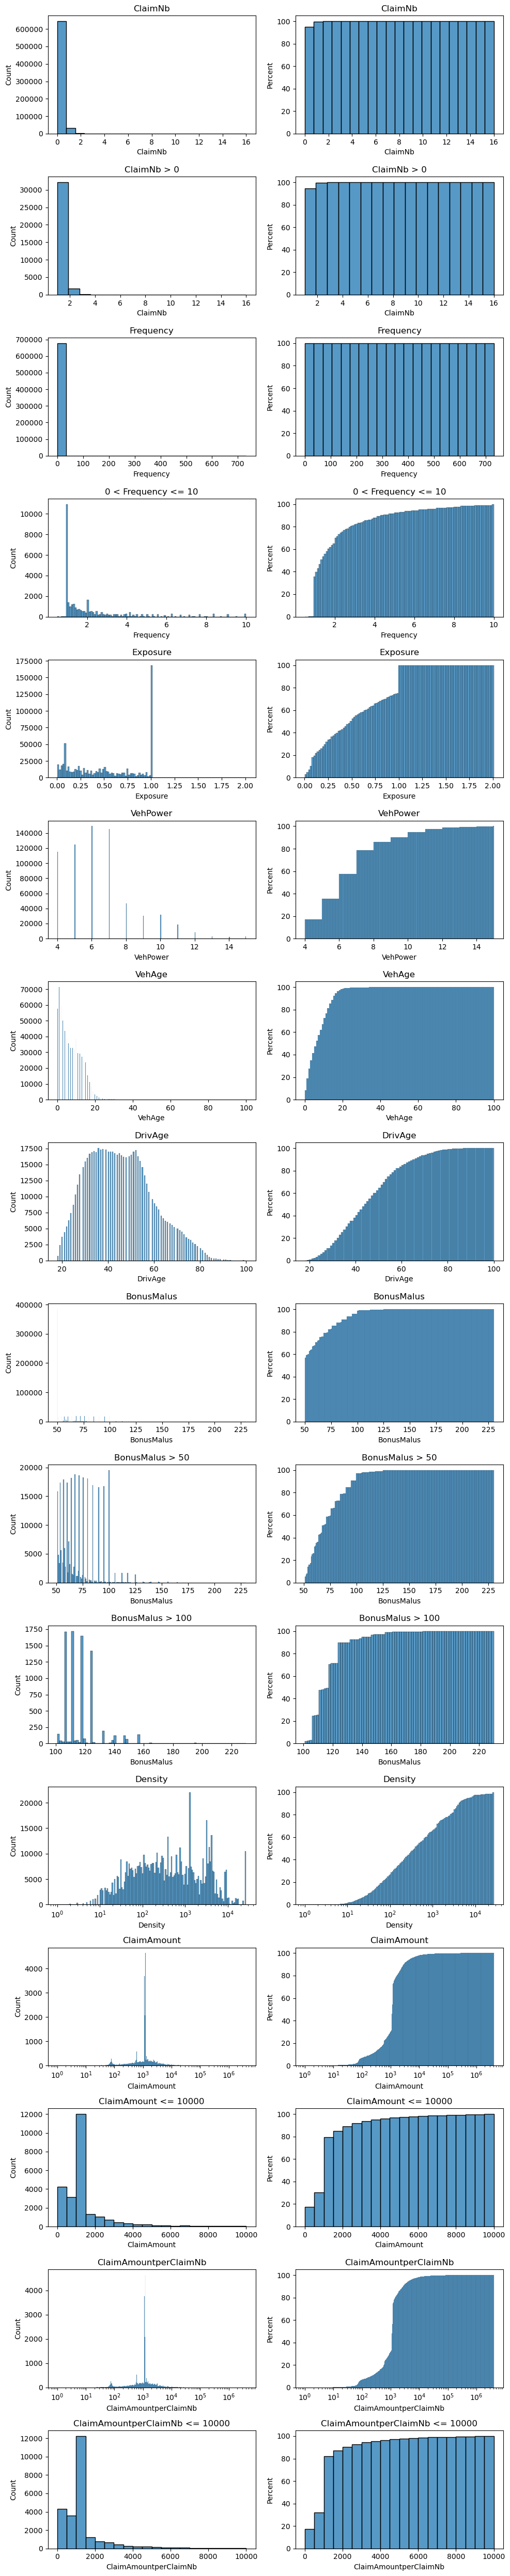

In [33]:
fig, ax = plt.subplots(16, 2, figsize=(10,50))

#Normale Histogramme
sns.histplot(df['ClaimNb'], ax=ax[0][0]).set_title('ClaimNb')
sns.histplot(df['ClaimNb'][df['ClaimNb']>0], ax=ax[1][0]).set_title('ClaimNb > 0')
sns.histplot(df['Frequency'], ax=ax[2][0]).set_title('Frequency')
sns.histplot(df['Frequency'][(df['Frequency']>0) & (df['Frequency']<=10)], ax=ax[3][0]).set_title('0 < Frequency <= 10')
sns.histplot(df['Exposure'], ax=ax[4][0]).set_title('Exposure')
sns.histplot(df['VehPower'], ax=ax[5][0]).set_title('VehPower')
sns.histplot(df['VehAge'], ax=ax[6][0]).set_title('VehAge')
sns.histplot(df['DrivAge'], ax=ax[7][0]).set_title('DrivAge')
sns.histplot(df['BonusMalus'], ax=ax[8][0]).set_title('BonusMalus')
sns.histplot(df['BonusMalus'][df['BonusMalus']>50], ax=ax[9][0]).set_title('BonusMalus > 50')
sns.histplot(df['BonusMalus'][df['BonusMalus']>100], ax=ax[10][0]).set_title('BonusMalus > 100')
sns.histplot(df['Density'], log_scale=True, ax=ax[11][0]).set_title('Density')
sns.histplot(df['ClaimAmount'], log_scale=True, ax=ax[12][0]).set_title('ClaimAmount')
sns.histplot(df['ClaimAmount'][df['ClaimAmount']<=10000], bins=20, ax=ax[13][0]).set_title('ClaimAmount <= 10000')
sns.histplot(df['ClaimAmountperClaimNb'], log_scale=True, ax=ax[14][0]).set_title('ClaimAmountperClaimNb')
sns.histplot(df['ClaimAmountperClaimNb'][df['ClaimAmountperClaimNb']<=10000], bins=20, ax=ax[15][0]).set_title('ClaimAmountperClaimNb <= 10000')

#Kumulative Histogramme
sns.histplot(df['ClaimNb'], stat='percent', cumulative='True', ax=ax[0][1]).set_title('ClaimNb')
sns.histplot(df['ClaimNb'][df['ClaimNb']>0], stat='percent', cumulative='True', ax=ax[1][1]).set_title('ClaimNb > 0')
sns.histplot(df['Frequency'], stat='percent', cumulative='True', ax=ax[2][1]).set_title('Frequency')
sns.histplot(df['Frequency'][(df['Frequency']>0) & (df['Frequency']<=10)], stat='percent', cumulative='True', ax=ax[3][1]).set_title('0 < Frequency <= 10')
sns.histplot(df['Exposure'], stat='percent', cumulative='True', ax=ax[4][1]).set_title('Exposure')
sns.histplot(df['VehPower'], stat='percent', cumulative='True', ax=ax[5][1]).set_title('VehPower')
sns.histplot(df['VehAge'], stat='percent', cumulative='True', ax=ax[6][1]).set_title('VehAge')
sns.histplot(df['DrivAge'], stat='percent', cumulative='True', ax=ax[7][1]).set_title('DrivAge')
sns.histplot(df['BonusMalus'], stat='percent', cumulative='True', ax=ax[8][1]).set_title('BonusMalus')
sns.histplot(df['BonusMalus'][df['BonusMalus']>50], stat='percent', cumulative='True', ax=ax[9][1]).set_title('BonusMalus > 50')
sns.histplot(df['BonusMalus'][df['BonusMalus']>100], stat='percent', cumulative='True', ax=ax[10][1]).set_title('BonusMalus > 100')
sns.histplot(df['Density'], log_scale=True, stat='percent', cumulative='True', ax=ax[11][1]).set_title('Density')
sns.histplot(df['ClaimAmount'], log_scale=True, stat='percent', cumulative='True', ax=ax[12][1]).set_title('ClaimAmount')
sns.histplot(df['ClaimAmount'][df['ClaimAmount']<=10000], bins=20, stat='percent', cumulative='True', ax=ax[13][1]).set_title('ClaimAmount <= 10000')
sns.histplot(df['ClaimAmountperClaimNb'], log_scale=True, stat='percent', cumulative='True', ax=ax[14][1]).set_title('ClaimAmountperClaimNb')
sns.histplot(df['ClaimAmountperClaimNb'][df['ClaimAmountperClaimNb']<=10000], bins=20, stat='percent', cumulative='True', ax=ax[15][1]).set_title('ClaimAmountperClaimNb <= 10000')
fig.tight_layout()

Auffälligkeiten bzgl. der Lagemaße und Verteilung der numerischen Merkmale:
- ``ClaimNb``: für ~95% der Verträge ist Wert = 0. Das ist nicht überraschend: Es ist zu erwarten, dass Großteil der Verträge in der relativ kurzen betrachteten Versicherungszeitraumsspanne von <= 1 Jahr keine Schadensansprüche aufweist. Werte > 3 treten so selten auf (Anzahl < 10), dass sie wohl als Ausreißer interpretierbar sind => für die Modellierung werden Werte > 3 auf 3 gesetzt werden.
- ``Frequency``: Der Mittelwert von ~26% sagt nichts über die Schadenhäufigkeit des Portfolios aus, da dafür der gewichtete Mittelwert gebildet werden muss mit dem Merkmal ``Exposure`` als Gewicht - diese Berechnung wird noch erfolgen. Auf Grund der häufig sehr kurzen Versicherungszeiträume einzelner Verträge, weisen diese im Falle eines Schadensereignisses eine als hoch berechnete Schadenhäufigkeit aus - das erklärt zum einen die hohen Werte. Zum anderen führen auch die die Ausreißer bzgl. ``ClaimNb`` zu hohen Werten => für die Modellierung wird ``Frequency`` auf Basis der dann in den Wertebereich eingeschränkten ``ClaimNb`` berechnet werden.
- ``Exposure``: für ~75% der Verträge ist Wert < 1 Jahr, kleinster sogar bei nur 1 Tag. Ist es üblich in Frankreich, dass viele Kfz-Haftplichtversicherungsverträge für Zeitraum < 1 Jahr abgeschlossen werden? Zudem ist Anteil der Werte > 1 Jahr vernachlässigbar klein. Die Vermutung ist, dass es sich um Datenfehler handelt und der eigentliche Beobachtungszeitraum bzgl. der Versicherungsverträge nur 1 Jahr beträgt => für die Modellierung werden Werte > 1 auf 1 gesetzt werden.
- ``VehAge``: Anteil der Autos, die älter als 20 Jahre sind, ist vernachlässigbar klein => für die Modellierung werden Werte > 20 auf 20 gesetzt werden.
- ``DriveAge``: Anteil der Fahrer, die älter als 90 Jahre sind, ist vernachlässigbar klein => für die Modellierung werden Werte > 90 auf 90 gesetzt werden.
- ``BonusMalus``: ~55% der Verträge weisen den niedrigsten Wert von 50 auf. Nur noch sehr wenig Verträge ab Wert > 110. Es fällt auf, dass es zu regelmäßigen Häufungen auf der ``BonusMalus``-Werteskala kommt. Letzter größerer Häufungspunkt mit Anzahl > 100 liegt ungefähr bei Wert 155. => für die Modellierung werden Werte > 160 auf 160 gesetzt und der Skalenbereich in Wertebereiche von jeweils Länge=10 zusammengefasst.
- ``Density``: ungleichmäßig verteilt ohne log-Transformation, aber relativ gleichmäßig mit log-Transformation => für die Modellierung wird log-skalierter Wert verwendet werden.
- ``ClaimAmount`` und ``ClaimAmountperClaimNb``: log-skalierte Verteilungen ähneln sich sehr. Bzgl. ``ClaimAmountperClaimNb`` liegt der Mittelwert bei ~2200 € und der Median bei ~1200 €. Der Maximalwert liegt bei ~4.1 Mio €. 50% der Werte liegen im relativ engen Intervall von ca. 700 € bis 1200 €. Die log-skalierte Verteilung weicht aufgrund der geballten Häufung in diesem Intervall relativ deutlich von einer Normalverteilung ab. Es handel sich ohne Anwendung einer log-Skalierung um eine linkssteile Verteilung, wie man in den untersten Plots ganz gut erkennen kann. Ähnlichkeit zu einer Gammaverteilung ist gegeben und sollte später bei Modellierung berücksichtigt werden.

## Berechnung Schadenhäufigkeit bzgl. gesamtem Portfolio

Es wird nun die Schadenhäufigkeit ``Frequency`` bzgl. des gesamten Portfolios berechnet und als zusätzliche Spalte der Tabelle hinzugefügt (zwecks späterer Darstellmöglichkeit als Basisvergleichslinie in Plots):

In [34]:
Frequency_Portfolio = df["ClaimNb"].sum() / df["Exposure"].sum()
Frequency_Portfolio_alternativ = np.average(df["Frequency"], weights=df["Exposure"])

# Test ob beide Berechnungsweisen zum selben Ergebnis führen:
assert Frequency_Portfolio == Frequency_Portfolio_alternativ, 'Inkonsistenz in Berechnungsweise!'
print("Schadenhäufigkeit bzgl. gesamtem Portfolio = {0:.1%}".format(Frequency_Portfolio))

#Hinzufügen als neue Spalte zur Tabelle:
df['Frequency_Portfolio'] = Frequency_Portfolio

Schadenhäufigkeit bzgl. gesamtem Portfolio = 10.1%


Somit verursacht ein (hypothetischer) Durchschnittsvertrag aus dem Portfolio ca. alle 10 Jahre einen Schaden.

## Berechnung Schadensbetrag pro Schadensfall bzgl. gesamtem Portfolio

Es wird nun der Schadensbetrag pro Schadensfall ``ClaimAmountperClaimNb`` bzgl. des gesamten Portfolios berechnet und als zusätzliche Spalte der Tabelle hinzugefügt (zwecks späterer Darstellmöglichkeit als Basisvergleichslinie in Plots):

In [35]:
df_temp = df.dropna(subset=["ClaimAmountperClaimNb"])
ClaimAmountperClaimNb_Portfolio = df_temp["ClaimAmount"].sum() / df_temp["ClaimNb"].sum()
ClaimAmountperClaimNb_Portfolio_alternativ = np.average(df_temp["ClaimAmountperClaimNb"], weights=df_temp["ClaimNb"])

# Test ob beide Berechnungsweisen zum selben Ergebnis führen:
assert ClaimAmountperClaimNb_Portfolio == ClaimAmountperClaimNb_Portfolio_alternativ, 'Inkonsistenz in Berechnungsweise!'
print("Schadensbetrag pro Schadensfall bzgl. gesamtem Portfolio = ", round(ClaimAmountperClaimNb_Portfolio, 2))

#Hinzufügen als neue Spalte zur Tabelle:
df['ClaimAmountperClaimNb_Portfolio'] = ClaimAmountperClaimNb_Portfolio

Schadensbetrag pro Schadensfall bzgl. gesamtem Portfolio =  2265.43


Somit verursacht ein (hypothetischer) Durchschnittsvertrag aus dem Portfolio einen Schadensbetrag von 2265.43 € pro Schaden.

<a id='Kennzahlen-und-Histogramme-bzgl-kategorialer-Merkmale'></a>
## Kennzahlen und Histogramme bzgl. kategorialer Merkmale

Deskriptive Statistik Kennzahlen bzgl. der kategorialen Merkmale:

In [36]:
df[[col for col in df.columns if df[col].dtype in ['object']]].describe()

VehBrand   VehGas    Area  Region
count    678013   678013  678013  678013
unique       11        2       6      21
top         B12  Regular       C  Centre
freq     166024   345877  191880  160601

Histogramm-Plots (kumulativ) um Verteilung der kategorialen Merkmale besser einschätzen zu können:

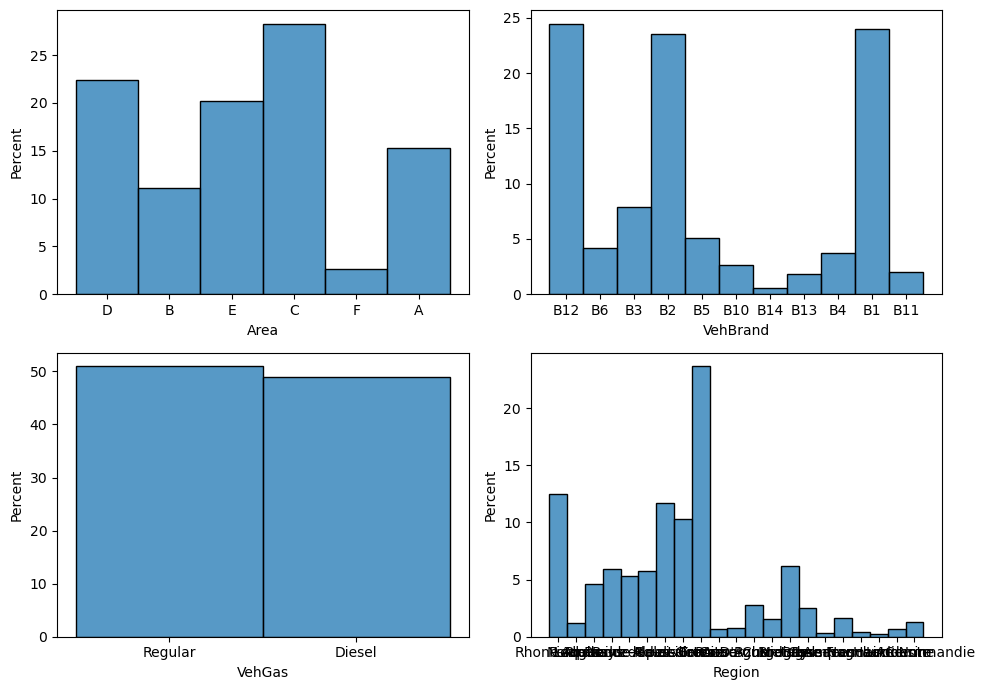

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(10,7))
sns.histplot(df['Area'], stat='percent', ax=ax[0][0])
sns.histplot(df['VehBrand'], stat='percent', ax=ax[0][1])
sns.histplot(df['VehGas'], stat='percent', ax=ax[1][0])
sns.histplot(df['Region'], stat='percent', ax=ax[1][1])
fig.tight_layout()

Detailbetrachtung: Verteilung der Werte von ``Region``:

In [38]:
df['Region'].value_counts() / df['Region'].count()

Centre                         0.236870
Rhone-Alpes                    0.125001
Provence-Alpes-Cotes-D'Azur    0.116982
Ile-de-France                  0.102935
Bretagne                       0.062126
Nord-Pas-de-Calais             0.059402
Pays-de-la-Loire               0.057154
Languedoc-Roussillon           0.052809
Aquitaine                      0.046207
Poitou-Charentes               0.028091
Midi-Pyrenees                  0.025281
Basse-Normandie                0.016066
Bourgogne                      0.015475
Haute-Normandie                0.012956
Picardie                       0.011790
Auvergne                       0.007798
Limousin                       0.006736
Corse                          0.006661
Champagne-Ardenne              0.004463
Alsace                         0.003245
Franche-Comte                  0.001956
Name: Region, dtype: float64

Auffälligkeiten bzgl. der Verteilung der kategorialen Merkmale:
- ``VehBrand``: Die 3 Automarken B1, B2, B12 dominieren mit einem Gesamtanteil von ~75%
- ``VehGas``: Ausgeglichene Aufteilung zwischen Regular und Diesel
- ``Region``: Region Centre weist mit ~24% die mit Abstand größte Anzahl an Verträgen auf

## Anpassung der Merkmale auf Basis der gewonnenen Erkenntnisse

Auf Basis der gewonnenen Erkenntnisse aus der voran gegangenen univariaten Analyse werden nun die Werte einzelner Merkmale angepasst.
Das vereinfacht die nachfolgende multivariate Analyse und macht sie auch aussagekräftiger. Zudem werden diese angepassten Merkmale dann auch als Grundlage für die Modelle verwendet werden - allerdings sind dann noch weitere modellspezifische Anpassungen notwendig. Die Anpassungen werden in einer neuen Tabelle ``df_prep``, auf Basis einer harten Kopie von Tabelle ``df``, vorgenommen.

Zusammengefasst erfolgen folgende Anpassungen:
- ``ClaimNb``: Werte > 3 werden auf 3 gesetzt
- ``Exposure``: Werte > 1 werden auf 1 gesetzt
- ``VehAge``: Werte > 20 werden auf 20 gesetzt
- ``DriveAge``: Werte > 90 werden auf 90 gesetzt
- ``BonusMalus``: Werte > 160 werden auf 160 gesetzt und der Skalenbereich in Wertebereiche von jeweils Länge=10 zusammengefasst.
- ``Density``: Werte werden log-skaliert.
- ``Density_temp``: Temporär benutztes, neues Merkmal für Vereinfachung der multivariaten Analyse, für die Modellierung wird es nicht benötigt. Werte werden log-skaliert und der Skalenbereich in Wertebereiche von jeweils Länge=1 zusammengefasst.
- ``Frequency``: wird neu berechnet auf Basis angepasster ``ClaimNb`` und angepasstem ``Exposure``

Für die vor zu nehmenden Merkmals-Anpassungen wird eine Funktion definiert (Code inspiriert aus [5]:

In [39]:
def cutAndBinColumns(df_input):
    """Erzeugt harte Kopie von übergebenem Dataframe df_input und beschneidet und/oder gruppiert dies, um für die
    Merkmale die relevanten Wertebereiche zu erhalten.
    Wertezuweisung basiert auf Erkenntnissen aus der vorgangenen Daten-Exploration.
    Rückgabewert ist das angepasste Dataframe df"""
    df = deepcopy(df_input) #Erzeugt harte Kopie von df_input, so dass df_input von Anpassungen unberührt bleibt.
    df['ClaimNb'] = df['ClaimNb'].apply(lambda x: 3 if x > 3 else x)
    df['Exposure'] = df['Exposure'].apply(lambda x: 1 if x > 1 else x)
    df['VehAge'] = df['VehAge'].apply(lambda x: 20 if x > 20 else x)
    df['DrivAge'] = df['DrivAge'].apply(lambda x: 90 if x > 90 else x)
    df['BonusMalus'] = df['BonusMalus'].apply(lambda x: 160 if x > 160 else round(x / 10) * 10)
    df['Density_temp'] = df['Density'].apply(lambda x: round(math.log(x)))
    df['Density'] = df['Density'].apply(lambda x: math.log(x))
    df['Frequency'] = df['ClaimNb'] / df['Exposure']
    return df

Durchführen der Anpassung und speichern als neues Dataframe ``df_prep``:

In [40]:
df_prep = cutAndBinColumns(df)

# Teste Wertebereiche:
assert df_prep['ClaimNb'].max() == 3, "Wertebereich nicht erwartungsgemäß!"
assert df_prep['Exposure'].max() == 1, "Wertebereich nicht erwartungsgemäß!"
assert df_prep['VehAge'].max() == 20, "Wertebereich nicht erwartungsgemäß!"
assert df_prep['DrivAge'].max() == 90, "Wertebereich nicht erwartungsgemäß!"
assert df_prep['BonusMalus'].max() == 160, "Wertebereich nicht erwartungsgemäß!"
assert df_prep['Density'].max() < 20, "Wertebereich nicht erwartungsgemäß!"

df_prep

IDpol  ClaimNb  Exposure  VehPower  VehAge  DrivAge  BonusMalus  \
0             1.0      1.0   0.10000       5.0     0.0     55.0          50   
1             3.0      1.0   0.77000       5.0     0.0     55.0          50   
2             5.0      1.0   0.75000       6.0     2.0     52.0          50   
3            10.0      1.0   0.09000       7.0     0.0     46.0          50   
4            11.0      1.0   0.84000       7.0     0.0     46.0          50   
...           ...      ...       ...       ...     ...      ...         ...   
678008  6114326.0      0.0   0.00274       4.0     0.0     54.0          50   
678009  6114327.0      0.0   0.00274       4.0     0.0     41.0         100   
678010  6114328.0      0.0   0.00274       6.0     2.0     45.0          50   
678011  6114329.0      0.0   0.00274       4.0     0.0     60.0          50   
678012  6114330.0      0.0   0.00274       7.0     6.0     29.0          50   

       VehBrand   VehGas Area   Density                       Region  \
0           B12  Regular    D  7.104144                  Rhone-Alpes   
1           B12  Regular    D  7.104144                  Rhone-Alpes   
2           B12   Diesel    B  3.988984                     Picardie   
3           B12   Diesel    B  4.330733                    Aquitaine   
4           B12   Diesel    B  4.330733                    Aquitaine   
...         ...      ...  ...       ...                          ...   
678008      B12  Regular    E  8.106816  Provence-Alpes-Cotes-D'Azur   
678009      B12  Regular    E  9.195227                Ile-de-France   
678010      B12   Diesel    D  7.187657                  Rhone-Alpes   
678011      B12  Regular    B  4.553877                    Bourgogne   
678012      B12   Diesel    B  4.174387                    Aquitaine   

        ClaimAmount  ClaimAmountperClaimNb  Frequency  Frequency_Portfolio  \
0               NaN                    NaN  10.000000             0.100703   
1               NaN                    NaN   1.298701             0.100703   
2               NaN                    NaN   1.333333             0.100703   
3               NaN                    NaN  11.111111             0.100703   
4               NaN                    NaN   1.190476             0.100703   
...             ...                    ...        ...                  ...   
678008          NaN                    NaN   0.000000             0.100703   
678009          NaN                    NaN   0.000000             0.100703   
678010          NaN                    NaN   0.000000             0.100703   
678011          NaN                    NaN   0.000000             0.100703   
678012          NaN                    NaN   0.000000             0.100703   

        ClaimAmountperClaimNb_Portfolio  Density_temp  
0                           2265.426981             7  
1                           2265.426981             7  
2                           2265.426981             4  
3                           2265.426981             4  
4                           2265.426981             4  
...                                 ...           ...  
678008                      2265.426981             8  
678009                      2265.426981             9  
678010                      2265.426981             7  
678011                      2265.426981             5  
678012                      2265.426981             4  

[678013 rows x 18 columns]

## Definition Hilfsfunktion zum Plotten von marginalen Schadenhäufigkeiten

Es wird nun eine Hilfsfunktionen definiert, welche das Plotten von marginalen Schadenhäufigkeiten im Folgenden vereinfacht.
Sie enthält auch Features, die erst später in der Modellierung verwendet werden (Code inspiriert aus [5]):

In [41]:
def plotFrequenciesAndExposures(df, columnsToPlot, predictionValues = False):
    """Plottet die gemessenen marginalen Schadenhäufigkeiten und Exposures bzgl. aller übergebenen Merkmale (columnsToPlot).
    Optional kann auch predictionValues = True gesetzt werden, dadurch werden auch die von den Modellen
    prognostizierten Werte angezeigt."""
    
    fig, ax = plt.subplots(len(columnsToPlot), 2, figsize=(10, len(columnsToPlot) * 5))
    i = 0 #Index für subplots
    
    #Erstelle Dictionary mit zu aggregierenden Merkmalen und der zu benutzenden Aggregationsmethode sowie Liste
    # an Merkmalen für die Linienplot gezeichnet werden soll (Hinweis: bzgl. 'Frequency_Portfolio' sind die Werte
    # alle gleich, d.h. bildet die Aggregatfunktion min genau wieder diesen Wert ab):
    dict_agg = {'ClaimNb':sum, 'Exposure':sum, 'Frequency_Portfolio':'min'} 
    list_lp = []
    #Falls predictionValues = True, hole alle vorhergesagten Zielgrößen aus übergebenem dataframe und füge diese dem
    #Dictionary und der Liste hinzu:
    if predictionValues == True:
        dict_agg.update({pred: 'mean' for pred in df_test_Freq.columns if 'Frequency_pred' in pred})
        list_lp += [pred for pred in df_test_Freq.columns if 'Frequency_pred' in pred]
    
    # Für jedes übergebene Merkmal wird diese Schleife durchlaufen, die jeweils 2 Plots erstellt:
    for col in columnsToPlot:
        # Gruppieren bzgl. Werten des übergebenen Merkmals
        df_pivot = df.groupby(by=[col]).agg(dict_agg).reset_index()
        # Index auf col Spalte setzen, vereinfacht plotten
        df_pivot.set_index(col, inplace=True)
        
        # Gemessene Schadenhäufigkeit auf Basis der Schadenanzahl und Versicherungszeit in der Gruppe berechnen:
        df_pivot['Frequency'] = df_pivot['ClaimNb'] / df_pivot['Exposure']
        
        # Linienplot bzgl. Frequency
        _ = sns.lineplot(data=df_pivot['Frequency'], label='Frequency', color='black', ax=ax[i][0])
        
        # Standardabweichung bzgl. der wahren Frequency berechnen unter Annahme eines Poisson-Models (aus [3], S. 17):
        df_pivot['Standarddeviation'] = np.sqrt(df_pivot['ClaimNb'])/ df_pivot['Exposure']
        
        #Konfidenzintervall mit 2-facher Standardabweichung bzgl. gemessener Frequency berechnen als Linienplots zeichnen
        df_pivot['CI_LowerBound'] = df_pivot['Frequency'] - 2 * df_pivot['Standarddeviation']
        df_pivot['CI_UpperBound'] = df_pivot['Frequency'] + 2 * df_pivot['Standarddeviation']
        
        # Konfidenzintervall mit 2-facher Standardabweichung um Linienplots zeichen:
        ax[i][0].fill_between(df_pivot.index, df_pivot['CI_LowerBound'], df_pivot['CI_UpperBound'],
                              alpha=0.25, color='grey')
        
        if predictionValues == True:
            # Linienplots bzgl. vorhergesagter Frequency des Modells
            #_ = sns.lineplot(data=df_pivot[list_lp[0]], markers=True, ax=ax[i][0])
            _ = sns.lineplot(data=df_pivot[list_lp[0]], label=list_lp[0], color='green', markers=False, ax=ax[i][0])
            _ = sns.lineplot(data=df_pivot[list_lp[1]], label=list_lp[1], color='red', marker='o', ax=ax[i][0])
            _ = sns.lineplot(data=df_pivot[list_lp[2]], label=list_lp[2], color='blue', marker='*', ax=ax[i][0])
            
        else:
            # Linienplot bzgl. Frequency_Portfolio
            _ = sns.lineplot(data=df_pivot['Frequency_Portfolio'], label='Frequency_Portfolio', color='green', ax=ax[i][0])
        
        # Barplot der kumulierten Versicherungszeit bzgl. des jeweiligen Werts des übergebenen Merkmals
        _ = sns.barplot(data=df_pivot, x=df_pivot.index, y='Exposure', ax=ax[i][1])
        
        #Skalierung der Achsen
        ax[i][0].set_ylim(0.05, 0.5)
        ax[i][0].set_yticks(ticks = [i/100 for i in range(5, 55, 5)])
        #ax[i][1].set_ylim(0, 30000)
        #ax[i][1].set_yticks(ticks = [i for i in range(0, 31000, 5000)])
        
        i += 1      
        
    fig.tight_layout()

<a id='Marginale-Schadenhäufigkeiten-bzgl-Merkmalen'></a>
## Marginale Schadenhäufigkeiten bzgl. Merkmalen

Die Marginalen Schadenhäufigkeiten bzgl. der einzelnen Merkmale können interessante erste Hinweise bzgl. dessen Beitrag zur Schadenhäufigkeit liefern. Deshalb wird im Folgenden die marginale Schadenhäufigkeit bzgl. der einzelnen Merkmale geplottet mit zusätzlicher Darstellung eines Konfidenzintervalls auf Basis der 2-fachen Standardabweichung unter einer Possion-Verteilungs-Annahme der Schadenhäufigkeit. Zusätzlich wird die Schadenhäufigkeit bzgl. des gesamten Portfolios als Vergleichsbasis mit dargestellt. Zudem wird das Exposure (summierte Versicherungszeit) bzgl. des jeweiligen Werteabschnitts als Balkendiagramm rechts daneben dargestellt - niedrige Werte sind nämlich mit höherer Schätzunsicherheit bzgl. des wahren Schadenhäufigkeitsparameters der Verteilung verbunden. Bzgl. aller Merkmale sind die Schadenhäufigkeits-Werte auf der y-Achse gleich skaliert um einen direkten visuellen Vergleich zu ermöglichen.

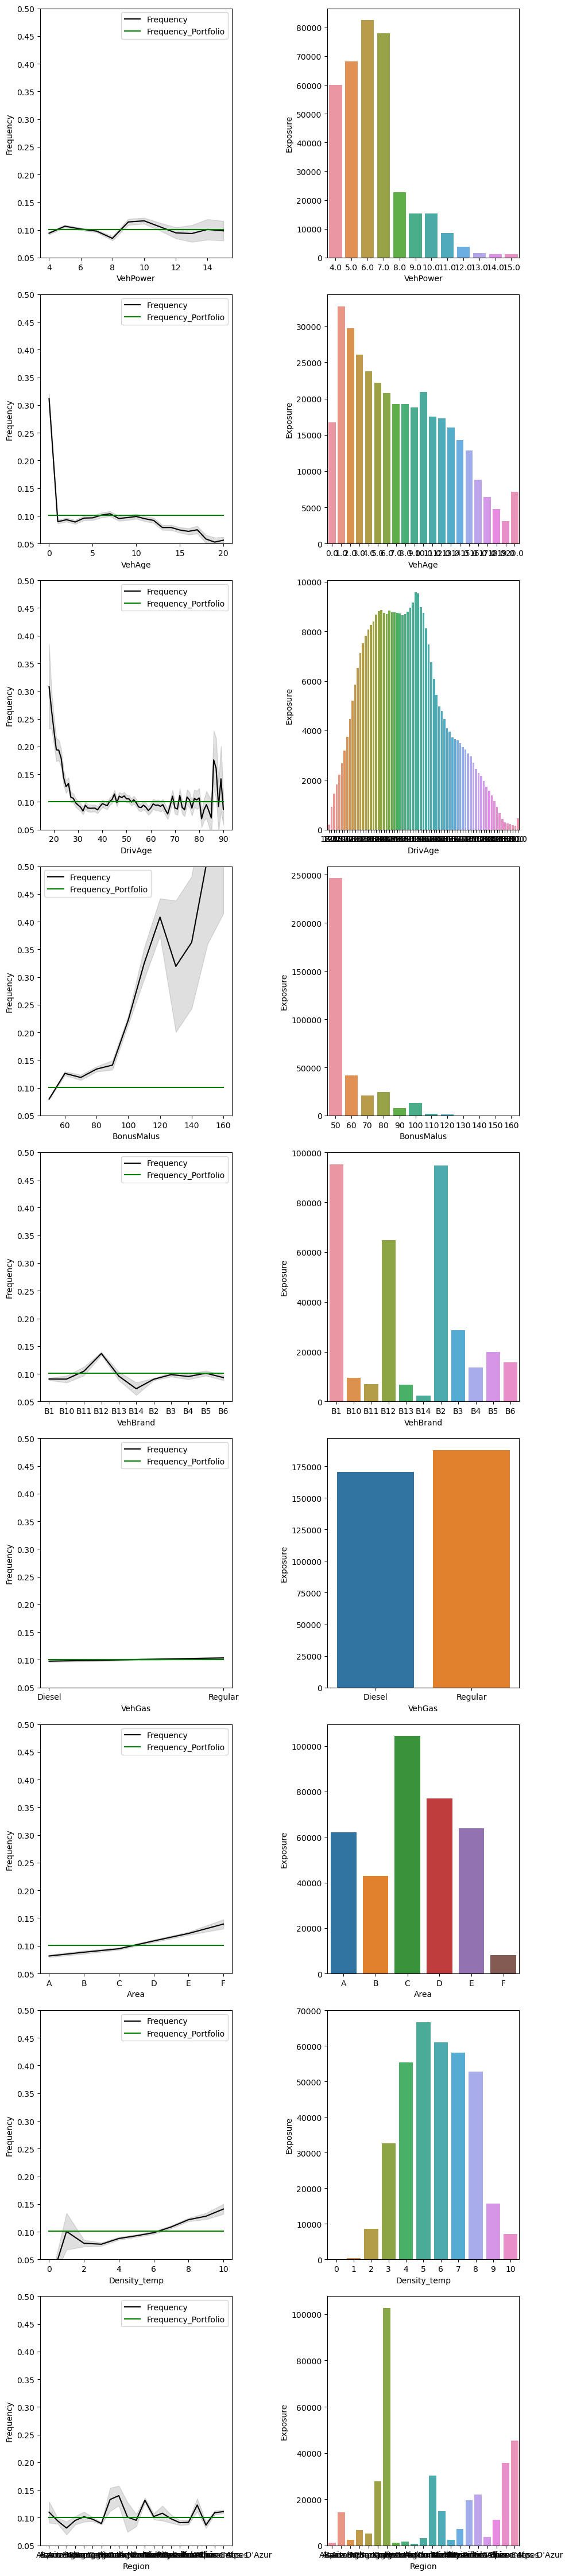

In [42]:
plotFrequenciesAndExposures(df_prep, ['VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'VehBrand',
                 'VehGas', 'Area', 'Density_temp', 'Region'], predictionValues = False)

Analyse der Plots bzgl. der marginalen Schadenhäufigkeiten der einzelnen Merkmale:
- ``VehPower``: Keiner klarer Zusammenhang bzgl. Motorleistung und Schadenhäufigkeit erkennbar. Merkwürdig ist der Abfall bei Wert 8 und das Plateau bei 9 und 10. Werte >12 sind mit großer Unsicherheit behaftet auf Grund geringen Exposures. Insgesamt ist der Einfluss des Merkmals auf die Schadenhäufigkeit als gering zu bewerten und braucht bei Modellierung nicht unbedingt berücksichtigt werden.
- ``VehAge``: Ältere Autos weisen eine zunehmend geringere Schadenhäufigkeit auf. Merkwürdig wirkt die hohe Schadenhäufigkeit für Neuwagen von über 30%. Das deutet auf eine eventuell verborgene Sonderheit bzgl. der Neuwagen in dem Datensatz hin. Insgesamt ist Einfluss des Merkmals auf die Schadenhäufigkeit als relevant zu bewerten und sollte bei der Modellierung berücksichtigt werden.
- ``DrivAge``: Auffällig deutlich höhere Schadenhäufigkeit für junge Fahrer bis ca. 26 Jahre. Werte ab 80 Jahre auf Grund geringen Exposures nicht aussagekräftig. Insgesamt ist Einfluss des Merkmals auf die Schadenhäufigkeit als relevant zu bewerten und sollte bei der Modellierung berücksichtigt werden.
- ``BonusMalus``: Klarer Zusammenhang zwischen BonusMalus-Wert und Schadenhäufigkeit erkennbar. Für Wert 50 liegt Schadenhäufigkeit bei nur ~8%, während sie ab Wert 100 auf >20% ansteigt. Das BonusMalus-Scoring scheint somit seinen Zweck zu erfüllen. Insgesamt ist Einfluss des Merkmals auf die Schadenhäufigkeit als sehr relevant zu bewerten und sollte unbedingt bei der Modellierung berücksichtigt werden.
- ``VehBrand``: Die Automarken B12 & B14 stechen hervor mit einer relativ hohen bzw. niedrigen Schadenhäufigkeit hervor. Das ist merkwürdig und deutet auf eine eventuell verborgene Sonderheit bzgl. der versicherten Fahrzeuge dieser Marke in diesem Datensatz hin. Ansonsten ist der Einfluss des Merkmals auf die Schadenhäufigkeit als gering zu bewerten, sollte aber wegen der Besonderheit bzgl. der Automarken der B12 und B14 bei Modellierung berücksichtigt werden.
- ``VehGas``: Kein relevanter Unterschied zwischen Diesel und Regular erkennbar. Insgesamt ist der marginale Einfluss des Merkmals auf die Schadenhäufigkeit als gering zu bewerten. Wird dennoch bei Modellierung berücksichtigt, da prinzipiell auch kompliziertere Interaktion mit anderen Merkmalen möglich ist.
- ``Area`` und ``Density``: Jeweils klarer positiver Zusammenhang mit Schadenhäufigkeit erkennbar. Zudem sind die Verläufe der Linienplots sehr ähnlich bzgl. ``Area`` und ``Density``. Da der Code von ``Area`` gemäß Definition anhand der Bevölkerungsdichte festgelegt wurde, ist das nicht verwunderlich => wird weiter unten noch untersucht werden. Der positive Zusammenhang von Schadenhäufigkeit mit der Bevölkerungsdichte ist nicht verwunderlich, da vermutlich höhere Bevölkerungsdichte mit höherem Verkehrsaufkommen und damit höherer Unfallgefahr korreliert. Insgesamt ist Einfluss des Merkmals ``Density`` auf die Schadenhäufigkeit als relevant zu bewerten und sollte bei der Modellierung berücksichtigt werden. Auf das Merkmal ``Area`` kann bei der Modellierung tendenziell verzichtet werden, da es redundant zu ``Density`` ist (wird noch näher untersucht).

## Definition Hilfsfunktion zum Plotten von marginalen Schadensbeträgen

Es wird nun eine Hilfsfunktionen definiert, welche das Plotten von marginalen Schadensbeträgen im Folgenden vereinfacht.
Sie enthält auch Features, die erst später in der Modellierung verwendet werden:

In [43]:
def plotClaimAmountperClaimNb(df, columnsToPlot, predictionValues = False):
    """Plottet die gemessenen marginalen Schadenbeträge bzgl. aller übergebenen Merkmale (columnsToPlot).
    Optional kann auch predictionValues = True gesetzt werden, dadurch werden auch die von den Modellen
    prognostizierten Werte angezeigt."""
    
    fig, ax = plt.subplots(len(columnsToPlot), 2, figsize=(10, len(columnsToPlot) * 5))
    i = 0 #Index für subplots
    
    #Erstelle Dictionary mit zu aggregierenden Merkmalen und der zu benutzenden Aggregationsmethode sowie Liste
    # an Merkmalen für die Linienplot gezeichnet werden soll (Hinweis: bzgl. 'ClaimAmountperClaimNb_Portfolio' sind
    # die Werte alle gleich, d.h. bildet die Aggregatfunktion min genau wieder diesen Wert ab):
    dict_agg = {'ClaimNb':sum, 'ClaimAmount':sum, 'ClaimAmountperClaimNb_Portfolio':'min'}
    list_lp = []
    #Falls predictionValues = True, hole alle vorhergesagten Zielgrößen aus übergebenem dataframe und füge diese dem
    # Dictionary und der Liste hinzu:
    if predictionValues == True:
        dict_agg.update({pred: 'mean' for pred in df_test_Claim.columns if 'ClaimAmountperClaimNb_pred' in pred})
        list_lp += [pred for pred in df_test_Claim.columns if 'ClaimAmountperClaimNb_pred' in pred]
    
    # Für jedes übergebene Merkmal wird diese Schleife durchlaufen, die jeweils 2 Plots erstellt:
    for col in columnsToPlot:
        # Einschränkung von df auf die Zeilen für die ClaimAmount nicht leer ist
        df = df.dropna(subset=['ClaimAmount'])
        # Gruppieren bzgl. Werten des übergebenen Merkmals
        df_pivot = df.groupby(by=[col]).agg(dict_agg).reset_index()
        # Index auf col Spalte setzen, vereinfacht plotten
        df_pivot.set_index(col, inplace=True)
        
        # Gemessenen Schadenbetrag pro Schadensfall auf Basis der Schadensbeträge und Schadenanzahl in der Gruppe berechnen:
        df_pivot['ClaimAmountperClaimNb'] = df_pivot['ClaimAmount'] / df_pivot['ClaimNb']
           
        # Linienplot bzgl.'ClaimAmountperClaimNb' mit 95%-Konfidenzintervall gemäß Bootstraping
        _ = sns.lineplot(data=df, x=col, y='ClaimAmountperClaimNb', label='ClaimAmountperClaimNb',
                         color='black', ci=95, ax=ax[i][0])
        
        if predictionValues == True:
            # Linienplots bzgl. vorhergesagter Schadenbetrag pro Schadensfall des Modells
            #_ = sns.lineplot(data=df_pivot[list_lp], markers=True, ax=ax[i][0])
            _ = sns.lineplot(data=df_pivot[list_lp[0]], label=list_lp[0], color='green', markers=False, ax=ax[i][0])
            _ = sns.lineplot(data=df_pivot[list_lp[1]], label=list_lp[1], color='red', marker='o', ax=ax[i][0])
            _ = sns.lineplot(data=df_pivot[list_lp[2]], label=list_lp[2], color='blue', marker='*', ax=ax[i][0])    
        else:
            # Linienplot bzgl. ClaimAmountperClaimNb_Portfolio
            _ = sns.lineplot(data=df_pivot['ClaimAmountperClaimNb_Portfolio'], label='ClaimAmountperClaimNb_Portfolio',
                         color='green', ax=ax[i][0])

        # Barplot der kumulierten Schadensanzahl bzgl. des jeweiligen Werts des übergebenen Merkmals
        _ = sns.barplot(data=df_pivot, x=df_pivot.index, y='ClaimNb', ax=ax[i][1])
        
        #Skalierung der Achsen
        ax[i][0].set_ylim(0, 10000)
        ax[i][0].set_yticks(ticks = [i for i in range(0, 11000, 1000)])
        #ax[i][1].set_ylim(0, 30000)
        #ax[i][1].set_yticks(ticks = [i for i in range(0, 31000, 5000)])
        
        i += 1      
        
    fig.tight_layout()

<a id='Marginale-Schadensbeträge-bzgl-Merkmalen'></a>
## Marginale Schadensbeträge bzgl. Merkmalen

Die marginalen Schadensbeträge bzgl. der einzelnen Merkmale können interessante erste Hinweise bzgl. dessen Beitrag zum Schadensbetrag liefern. Deshalb wird im Folgenden der marginale Schadensbetrag bzgl. der einzelnen Merkmale geplottet mit zusätzlicher Darstellung eines 95%-Konfidenzintervalls auf Basis von Bootstrapping. Zusätzlich wird der Schadensbetrag bzgl. des gesamten Portfolios als Vergleichsbasis mit dargestellt. Zudem wird die summierte Schadensanzahl des jeweiligen Werteabschnitts als Balkendiagramm rechts daneben dargestellt - niedrige Werte sind nämlich mit höherer Schätzunsicherheit bzgl. des wahren Schadensbetragsparameters der Verteilung verbunden. Bzgl. aller Merkmale sind die Schadensbetrags-Werte auf der y-Achse gleich skaliert um einen direkten visuellen Vergleich zu ermöglichen.

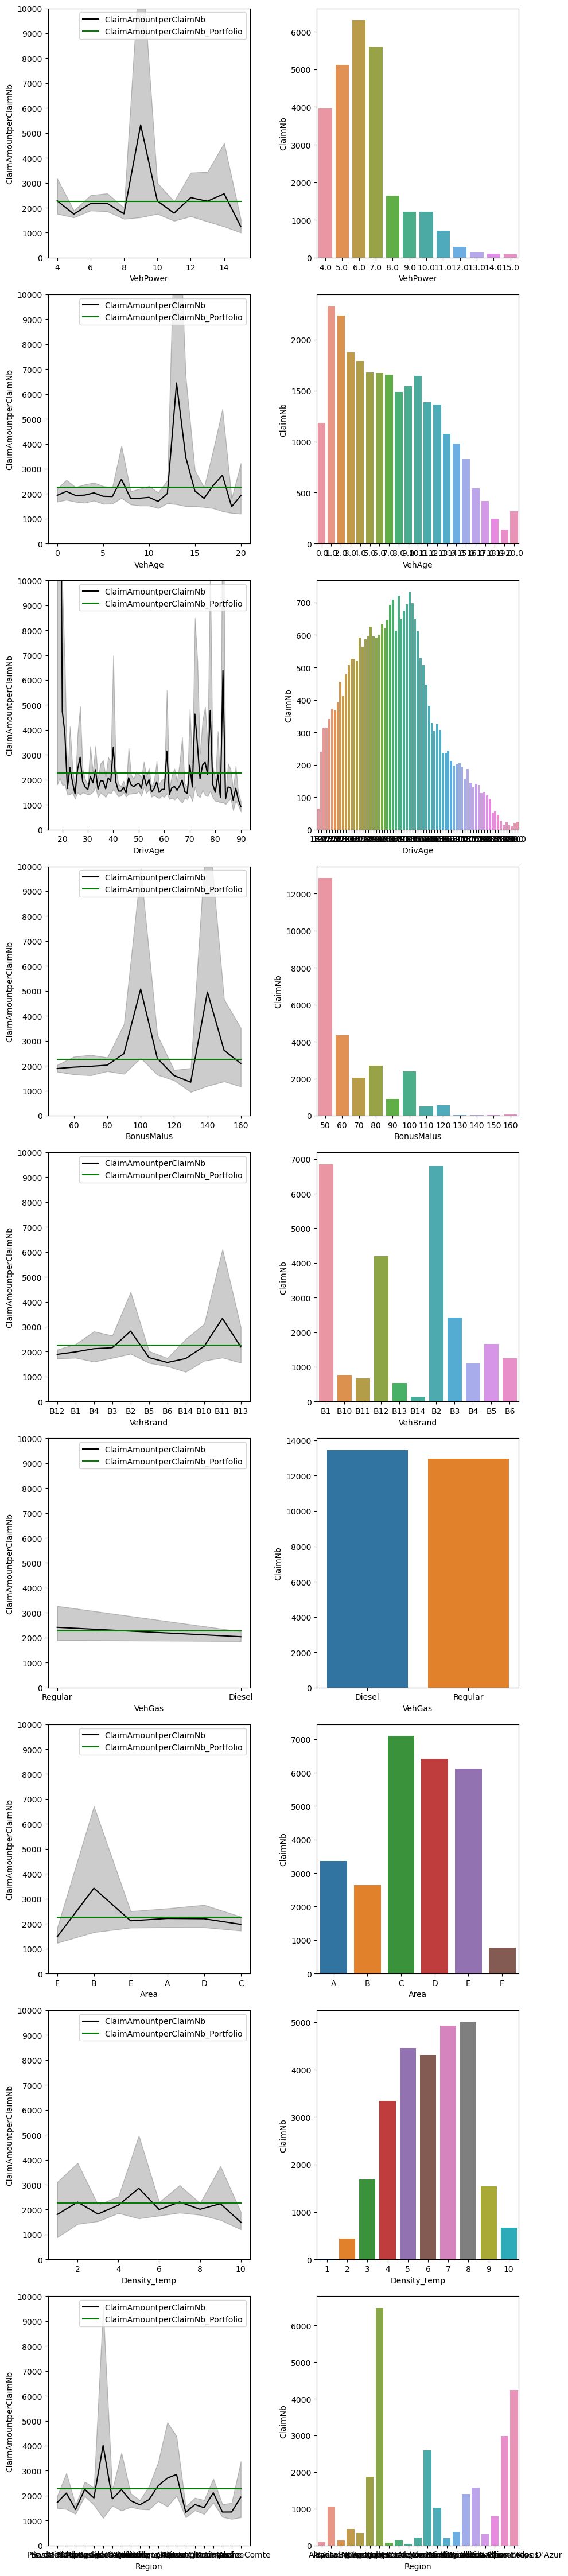

In [44]:
plotClaimAmountperClaimNb(df_prep, ['VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'VehBrand',
                 'VehGas', 'Area', 'Density_temp', 'Region'], predictionValues = False)

Analyse der Plots bzgl. der marginalen Schadenbeträge der einzelnen Merkmale:
- Generell muss beachtet werden, dass im Datensatz die Anzahl der Verträge mit dokumentierten Schadensbeträgen (24944) um Größenordnungen geringer ist als die Anzahl an Versicherungsverträgen (678013). Dadurch ist die Schätzunsicherheit bzgl. des wahren marginalen Schadensbetrags deutlich größer als im Vergleich zur Schätzunsicherheit bzgl. der wahren marginalen Schadenhäufigkeit. Dies spiegelt sich in den relativ breiten 95%-Konfidenzintervallen bzgl. der Merkmale wider.
- Bzgl. der meisten Merkmale liegt der Schadensbetrag pro Schadensfall bzgl. des gesamten Portfolios zum Großteil innerhalb des Konfidenzintervalls. Somit kann bzgl. dieser Merkmale und Intervalle nicht signifikant abgelehnt werden, dass das Merkmal in diesem Intervall überhaupt keinen Einfluss auf den Schadensbetrag hat.
- Zudem lassen sich bzgl. aller Merkmale keine systematischen Trends bzgl. des marginalen Schadenbetrags erkennen. Diese Feststellung, in Kombination mit den den relativ breiten 95%-Konfidenzintervallen, legt die Vermutung nahe, dass es sich bei den vorhandenen Ausreißern nach oben und unten um reines Zufallsrauschen handelt.
- Insgesamt lässt sich daraus die Hypothese für die Modellierung aufstellen, dass der sehr simple Schätzalgorithmus "sage immer den Schadensbetrag pro Schadensfall bzgl. des gesamten Portfolios vorher" näherungsweise gleich gut abschneiden wird wie ein ausgefeilteres Modell
- Intuitiv wäre es nicht überraschend, wenn es keinen nennenswerten Zusammenhang zwischen den im Datensatz vorhandenen Risikomerkmalen und der erwarteten Schadenshöhe gibt. Spontan fallen mir momentan nur wenige plausible kausale Zusammenhänge dazu ein: Ein Beispiel wäre z.B.: Junge Fahrer und/oder stark motorisierte Fahrzeuge fahren schneller als der Durchschnitt und dadurch wird potenziell ein höherer Kfz-Haftpflichtschaden im Falle eines Unfalls verursacht.

In [45]:
#Plausilibitätschecks:
# Einschränkung von df auf der Zeilen für die ClaimAmount nicht leer ist
df_temp = df_prep.dropna(subset=['ClaimAmount'])
# Gruppieren bzgl. Werten des übergebenen Merkmals
df_pivot = df_temp.groupby(by='Density_temp').agg({'IDpol': 'count', 'ClaimNb':sum, 'ClaimAmount':sum}).reset_index()
df_pivot['ClaimAmountperClaimNb'] = df_pivot['ClaimAmount'] / df_pivot['ClaimNb']
df_pivot

Density_temp  IDpol  ClaimNb  ClaimAmount  ClaimAmountperClaimNb
0             1     21     22.0     48010.32            2182.287273
1             2    419    434.0    982056.22            2262.802350
2             3   1628   1680.0   3095201.40            1842.381786
3             4   3190   3341.0   7588518.43            2271.331467
4             5   4229   4452.0  13176911.77            2959.773533
5             6   4095   4315.0   8700801.22            2016.408162
6             7   4644   4930.0  11661607.80            2365.437688
7             8   4666   5003.0  10163831.10            2031.547292
8             9   1435   1543.0   3447661.79            2234.388717
9            10    617    673.0   1044616.45            1552.178975

In [46]:
22*2182.287273

48010.320005999994

<a id='Multivariate-Analyse-bzgl-Merkmalen'></a>
# Multivariate Analyse bzgl. Merkmalen

In diesem Abschnitt wird auf Zusammenhänge zwischen den einzelnen Merkmalen untersucht. Dabei wird der Zusammenhang zwischen den numerischen Merkmalen mittels Berechnung der Korrelation untersucht. Der paarweise Zusammenhang zwischen den restlichen Merkmalen wird mittels Darstellung von Heatmaps hinsichtlich des aggregierten Versicherungszeitraums ``Exposure`` untersucht.

<a id='Korrelation-der-Merkmale'></a>
## Korrelation der numerischen Merkmale

Um den Zusammenhang zwischen den numerischen Merkmalen zu untersuchen, wird die Pearson und Spearman Korrelation angewendet:

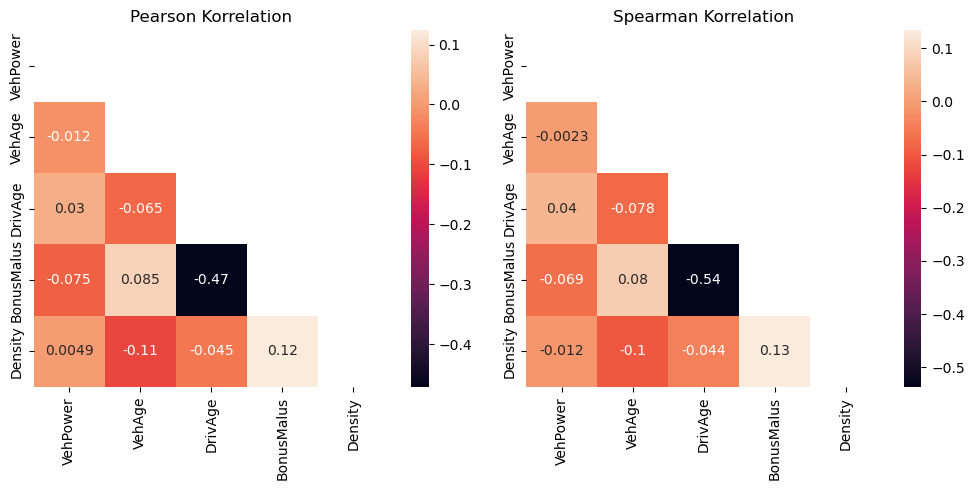

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].set_title('Pearson Korrelation')
ax[1].set_title('Spearman Korrelation')

df_corr_pear = df_prep[['VehPower','VehAge','DrivAge','BonusMalus','Density']]
mask_ut = np.triu(np.ones(df_corr_pear.corr().shape)).astype(bool)
sns.heatmap(df_corr_pear.corr(), mask=mask_ut, annot=True, ax=ax[0])

df_corr_spear = df_prep[['VehPower','VehAge','DrivAge','BonusMalus','Density']]
mask_ut = np.triu(np.ones(df_corr_spear.corr(method='spearman').shape)).astype(bool)
sns.heatmap(df_corr_spear.corr(method='spearman'), mask=mask_ut, annot=True, ax=ax[1])

fig.tight_layout()

Pearson und Spearman Korrelatonsmaß messen die Zusammenhänge zwischen den Merkmalen sehr ähnlich.
Auffälligkeiten:
- ``BonusMalus`` und ``DrivAge``: deutlich negativer Zusammenhang zwischen den beiden Merkmalen: je jünger der Fahrer desto höher ist das BonusMalus-Level. Dieser Zusammenhang ist angesichts der bereits zuvor beobachteten höheren Schadenhäufigkeit bei jüngeren Fahrern nicht überraschend.
- ``BonusMalus`` und ``Density``: schwach positiver Zusammenhang zwischen den beiden Merkmalen: Hier könnte wieder das bereits zuvor beobachtete Muster eine Rolle spielen, dass höhere Bevölkerungsdichte mit höherer Schadenhäufigkeit korreliert.
- ``VehAge`` und ``Density``: schwach negativer Zusammenhang zwischen den beiden Merkmalen: Fahren auf dem Land eher ältere Autos als in der Stadt?

<a id='Paarweise-Zusammenhänge-zwischen-restlichen-Variablen-mittels-Heatmaps'></a>
## Paarweise Zusammenhänge zwischen restlichen Variablen mittels Heatmaps

Nun wird der paarweise Zusammenhang zwischen den restlichen Merkmalen mittels Darstellung von Heatmaps hinsichtlich des aggregierten Versicherungszeitraums ``Exposure`` untersucht:

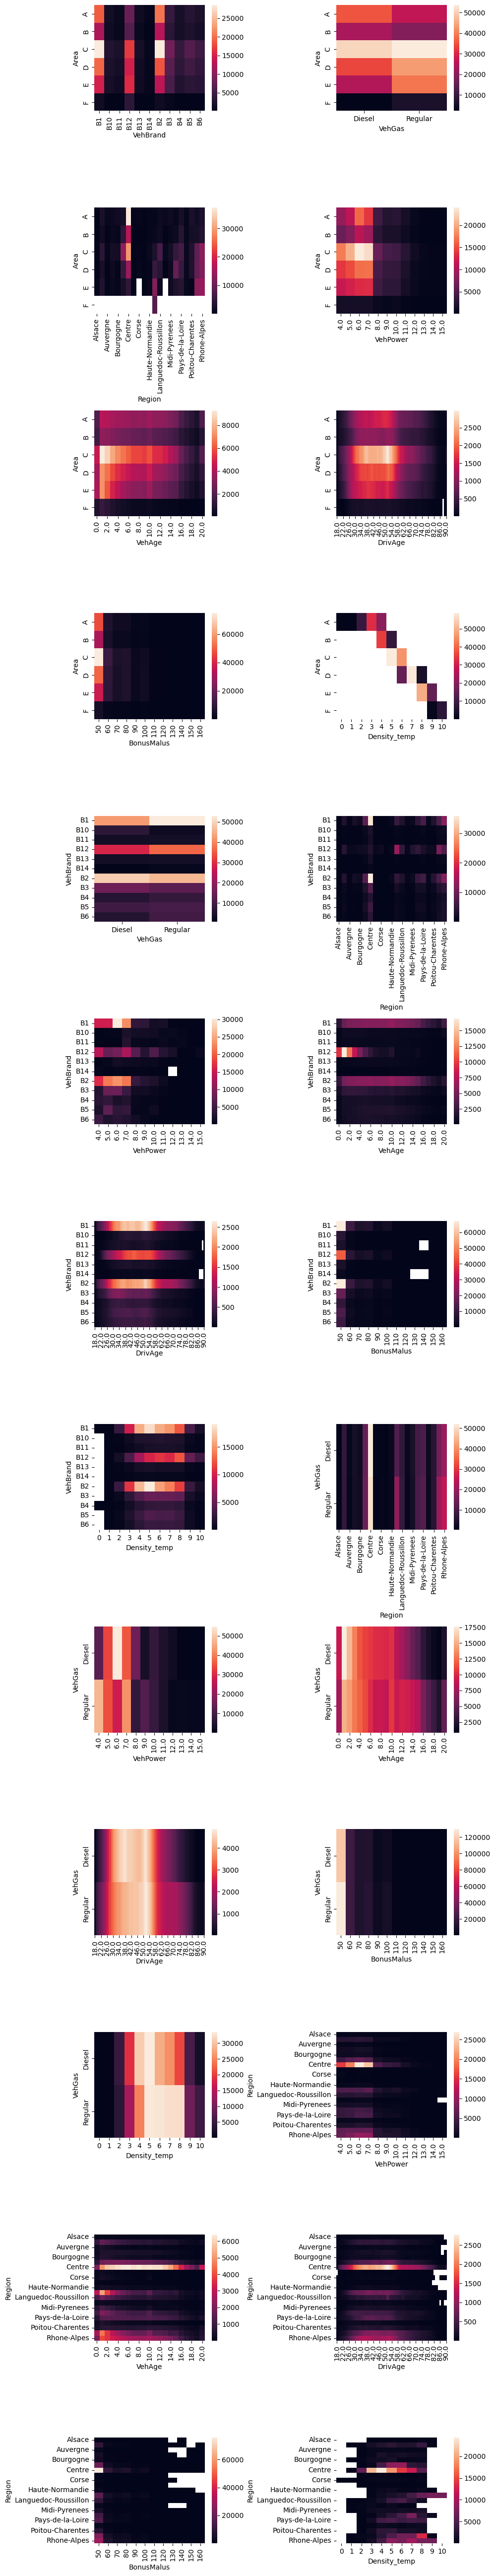

In [48]:
# Definition notwendiger Spalten
columns_cat = ['Area', 'VehBrand', 'VehGas', 'Region']
columns_cat_used = []
columns_num = ['VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density_temp']
columns_all = columns_cat + columns_num

# Konfiguration Darstellung
fig, ax = plt.subplots(13, 2, figsize=(10, 13 * 4))
i, j = (0, 0)

# Schleife zur Darstellung aller kategorialen Merkmalen gegenüber restlichen Merkmalen hinsichtlich Exposure-Summe
for col_cat in columns_cat:
    columns_cat_used.append(col_cat)
    for col_all in [col for col in columns_all if col not in columns_cat_used]:
        sns.heatmap(pd.pivot_table(df_prep, index=col_cat, columns=col_all, values='Exposure', aggfunc=np.sum),
                           ax=ax[i][j])
        if j < 1:
            j += 1
        else:
            i += 1
            j = 0

fig.tight_layout()

Ergebnisse der paarweisen Untersuchung der Merkmale auf Zusammenhänge:
- Hinsichtlich ``Area`` und ``Density`` lässt sich gut nachvollziehen, dass die Kategorien A bis F von ``Area`` bzgl. ``Density`` (Bevölkerungsdichte) kalibriert worden sind. Somit sollte für die Modellierung nur eine der beiden Variablen berücksichtigt werden, da Multikollinearität in den unabhängigen Variablen eines Modells zur ungenaueren Schätzung der Regressionskoeffizienten führen kann.
- ``VehBrand`` B12 weist außergewöhnlich viele relativ neue versicherte Wagen im Alter von 1-3 Jahren auf.

<a id='Modellierung'></a>
# Modellierung

Nun wird mit der Modellierung begonnen um Schadenwahrscheinlichkeit und Schadenaufwand für einen Kunden mit gegebenen Risikomerkmalen prognostizieren zu können. Sowohl für die Modellierung der Schadenwahrscheinlichkeit als auch für den Schadenaufwand werden jeweils folgende Modelle definiert und verwendet mit teils unterschiedlicher Konfiguration bzgl. Schadenwahrscheinlichkeit und Schadenaufwand:
- Dummy-Regressor: Basisvergleichslinie für die anderen Modelle, da immer nur der gewichtete Trainingsdaten-Mittelwert bzgl. der Zielgröße ausgegeben wird
- Generalized Linear Model (GLM): gängiges Modell bei Versicherungen
- Extreme Gradient Boosting (XGBoost) Model: relativ neues, auf breiten Gebieten erfolgreiches Machine-Learning-Modell

Dabei wird für jedes Modell eine individuelle Datenverarbeitungspipeline gebaut, da je nach Modelltyp unterschiedliche Datenaufbereitungen nötig sind. Die Daten werden dann jeweils bzgl. der Zielgrößen Schadenwahrscheinlichkeit und Schadenaufwand in Trainings- und Testdaten aufgespalten. Die Modelle werden dann jeweils auf Basis der Trainingsdaten trainiert. Mit dem jeweils trainierten Modell werden anschließend die Zielgrößen-Werte vorhergesagt - sowohl bzgl. der Trainings- als auch bzgl. der Testdaten. Auf Basis der gemessenen ggü. den vorhergesagten Werten wird je Modell und pro Trainings- und Testdatensatz jeweils eine Scoring-Wert basierend auf der passenden Performance-Metrik berechnet. U.a. anhand der Scoring-Werte kann die Modellperformance dann miteinander verglichen werden. In den danach folgenden Abschnitten finden dann zusätzlich visuelle Vergleiche der Modelle anhand der prognostizierten marginalen Werte bzgl. der Zielgrößen statt. Zudem findet ein visuelle Kontrolle der Modellkalibrierung statt, indem die prognostizierten Werte in geordneter Reihenfolge den gemessenen Werte gegenüber gestellt werden.

## Definition von Hilfsfunktionen

Nachfolgende Variablen und Funktionen werden später für die Modellauswertung benötigt.

In [49]:
# Definition der Dictionaries 'scoringResults_Frequency' und 'scoringResults_ClaimAmountperClaimNb' zwecks Speicherung
# von Modellergebnissen
scoringResults_Frequency = {}
scoringResults_ClaimAmountperClaimNb = {}

In [50]:
def predictAndSaveResults(modelName, model, targetName='Frequency'):
    """Prognostiziert Zielgröße mit übergebenem Namen 'targetName' (='Frequency' oder ='ClaimAmountperClaimNb')
    auf Basis des übergebenen, gefitteten Modells 'model' mit Name 'modelName' sowohl für die
    zugehörigen Trainings- als auch Testdaten.
    Fügt prognostizierte Zielgrößen-Werte den Dataframes jeweiligen Trainings- als auch Testdataframes hinzu.
    Fügt Scoringergebnisse dem Dictionary 'scoringResults_Frequency' bzw. 'scoringResults_ClaimAmountperClaimNb' hinzu."""

    if targetName == 'Frequency':
        # Berechne die prognostizierte Werten des Modells bzgl. df_train_Freq und df_test_Freq
        df_train_Freq[targetName + '_pred_' + modelName] = model.predict(df_train_Freq)
        df_test_Freq[targetName + '_pred_' + modelName] = model.predict(df_test_Freq)
        
        #Berechnen der mittleren Poisson-Abweichung bzgl. 'Frequency' für df_train_Freq und df_test_Freq
        scoringResults_Frequency[modelName + '_meanPoissonDeviance_df_train_Freq'] = round(
            mean_poisson_deviance(df_train_Freq["Frequency"],
                                  df_train_Freq['Frequency_pred_' + modelName],
                                  sample_weight=df_train_Freq["Exposure"]), 4)
        
        scoringResults_Frequency[modelName + '_meanPoissonDeviance_df_test_Freq'] = round(
            mean_poisson_deviance(df_test_Freq["Frequency"],
                                  df_test_Freq['Frequency_pred_' + modelName],
                                  sample_weight=df_test_Freq["Exposure"]), 4)
        result_table = pd.DataFrame(scoringResults_Frequency.items(), columns=['Model_Metric_Data_Target', 'Value of Metric'])
    else:
        # Berechne die prognostizierte Werten des Modells bzgl. df_train_Claim und df_test_Claim
        df_train_Claim[targetName + '_pred_' + modelName] = model.predict(df_train_Claim)
        df_test_Claim[targetName + '_pred_' + modelName] = model.predict(df_test_Claim)
        
        #Berechnen der mittleren Gamma-Abweichung bzgl. 'ClaimAmountperClaimNb' für df_train_Claim und df_test_Claim      
        scoringResults_ClaimAmountperClaimNb[modelName + '_meanGammaDeviance_df_train_Claim'] = round(
            mean_gamma_deviance(df_train_Claim["ClaimAmountperClaimNb"], 
                                df_train_Claim['ClaimAmountperClaimNb_pred_' + modelName],
                                sample_weight=df_train_Claim["ClaimNb"]), 4)
        
        scoringResults_ClaimAmountperClaimNb[modelName + '_meanGammaDeviance_df_test_Claim'] = round(
            mean_gamma_deviance(df_test_Claim["ClaimAmountperClaimNb"],
                                df_test_Claim['ClaimAmountperClaimNb_pred_' + modelName],
                                sample_weight=df_test_Claim["ClaimNb"]), 4)
        result_table = pd.DataFrame(scoringResults_ClaimAmountperClaimNb.items(), columns=['Model_Metric_Data_Target', 'Value of Metric'])
        
    return result_table

## Dummy-Regressor Modell bzgl. Schadenwahrscheinlichkeit und Schadenaufwand

Das Dummy-Regressor Modell ist ein triviales Modell, welches unabhängig von sämtlichen Merkmalen konstant den gewichteten Trainingsdaten-Mittelwert bzgl. der Zielgröße ausgibt. Es dient hinsichtlich der Performance-Metriken als Basisvergleichslinie für die anderen Modelle. D.h. so lässt sich feststellen, ob das GLM- oder XGBoost-Modell überhaupt einen Mehrwert in der Prognose ggü. solch einem simplen Prognosemodell ergeben.

### Definition des Datenvorverarbeitungsprozesses

Da es sich um ein triviales Modell handelt, bei dem die Merkmale keine Rolle für den Prognosewert spielen, ist keine Datenvorverarbeitung für das Modell notwendig.

### Definition des Modells

Es ist keine Definition einer Pipeline notwendig, da das Dummy-Regressor Modell keinen Datenvorverabeitungsprozess benötigt - somit wird das Dummy-Regressor Modell direkt definiert. Zu beachtende Unterschiede bzgl. Dummy-Regressor Modell für Schadenwahrscheinlichkeit ggü. Schadenaufwand sind:
- Die Zielgröße ``Frequency`` wird später beim Training mit der Variable ``Exposure`` gewichtet
- Die Zielgröße ``ClaimAmountperClaimNb`` wird später beim Training mit der Variable ``ClaimNb`` gewichtet

In [51]:
#Dummy-Regressor bzgl. Frequency und ClaimAmountperClaimNb
dummy_Frequency = DummyRegressor(strategy='mean')
dummy_ClaimAmountperClaimNb = DummyRegressor(strategy='mean')

## Generalized linear model (GLM) bzgl. Schadenwahrscheinlichkeit und Schadenaufwand

Bzgl. der Prognose der Schadenwahrscheinlichkeit ``Frequency`` wird ein Generalized linear model (GLM) unter Poisson-Verteilungsannahme mit log-Link Funktion verwendet, da dies ein gängiges Modell für die Prognose von erwarteten Schadenhäufigkeiten unter gegebenen Risikomerkmalen im Sachversicherungsbereich ist (vgl. [2], Abstract).

Bzgl. der Prognose des Schadenaufwands pro Schadensfall ``ClaimAmountperClaimNb`` wird ein Generalized linear model (GLM) unter Gamma-Verteilungsannahme mit log-Link Funktion verwendet, da dies ein gängiges Modell für die Prognose von erwartetem Schadenaufwand pro Schadensfall unter gegebenen Risikomerkmalen im Sachversicherungsbereich ist (vgl. https://medium.com/swlh/modeling-insurance-claim-severity-b449ac426c23).

Der Code bzgl. Datenvorverarbeitung und Pipeline ist inspiriert aus [4].

### Definition des Datenvorverarbeitungsprozesses

Sowohl bzgl. dem GLM für Schadenwahrscheinlichkeit als auch bzgl. dem für Schadenaufwand wird ein Datenvorverarbeitungsprozess angewandt. Dazu wird eine Pipeline definiert, die bzgl. der Merkmale spezifsche Daten-Transformationen durchführt. Dabei werden die Transformationen auf Basis der Erkenntnisse aus der voran gegangenen Daten-Erkundung im Zusammenhang mit den benötigten Merkmals-Eigenschaften für das GLM definiert. Folgende GLM spezifische Besonderheiten müssen beachtet werden:
- bzgl. Merkmalen für die ein nicht-monotoner Zusammenhang mit der marginalen Schadenhäufigkeit bzw. dem marginalen Schadenaufwand erkannt wurde, ist eine Diskretisierung des Merkmals in ausreichend viele Teil-Intervalle sinnvoll. Diese Teil-Intervalle werden dann jeweils als eigenes Merkmal mit den möglichen Werten 0 oder 1 berücksichtigt, d.h. 'one-hot-encoded'. Dadurch kann das GLM dann auch einen nicht-monotonen Zusammenhang abbilden.
- alle Merkmale mit kategorialen Werten müssen ebenfalls diskretisiert (d.h. one-hot-encoded) werden

Erläuterung der Transformationen der einzelnen Variablen auf Basis der Erkenntnisse aus der voran gegangenen Daten-Erkundung für beide GLMs (unterscheiden sich nur hinsichtlich der Transformation von ``BonusMalus`` - ansonsten gleich):
- ``BonusMalus``: bzgl. Schadenwahrscheinlichkeit keine Transformation, da (steigend) monotoner Zusammenhang mit der marginalen Schadenhäufigkeit. Bzgl. Schadenaufwand one-hot-encoding da kein klarer Zusammenhang erkennbar und somit ein nicht-monotoner Zusammenhang bestehen könnte.
- ``VehAge`` und ``DrivAge``: Diskretisierierung in jeweils 10 Teile und dann One-hot-encoding, da sie gemäß der erfolgten Daten-Erkundung einen nicht-monotonen Zusammenhang mit der marginalen Schadenhäufigkeit aufweisen
- ``Density``: Log-Skalierung. Durch Log-Skalierung wird Wertebereich deutlich eingegrenzt - bei zu großem Wertebereich bestünde nämlich Gefahr, dass dieses Merkmal ggü. den anderen Merkmalen zu stark dominiert beim Fitten des Modells.
- ``VehPower``: One-hot-encoding, da VehPower gemäß der erfolgten Daten-Erkundung einen nicht-monotonen Zusammenhang mit der marginalen Schadenhäufigkeit aufweist
- ``VehBrand``, ``VehGas``, ``Region``: One-hot-encoding, da es sich um kategoriale Variablen handelt
- Area: nicht berücksichtigt, da stark korreliert mit Density und liefert somit keinen Mehrwert

In [55]:
# Preprocessor für das GLM bzgl. Frequency
glm_preprocessor_Frequency = ColumnTransformer(
    [
        ("passthrough_numeric", "passthrough", ["BonusMalus", "Density"]),
        ("binned_onehot_numeric", KBinsDiscretizer(n_bins=10, subsample=200000), ["VehAge", "DrivAge"]),
        ("onehot_categorical", OneHotEncoder(), ["VehBrand", "VehPower", "VehGas", "Region"]),
    ],
    remainder="drop"
)

# Preprocessor für das GLM bzgl. ClaimAmountperClaimNb
glm_preprocessor_ClaimAmountperClaimNb = ColumnTransformer(
    [
        ("passthrough_numeric", "passthrough", ["Density"]),
        ("binned_onehot_numeric", KBinsDiscretizer(n_bins=10, subsample=200000), ["VehAge", "DrivAge"]),
        ("onehot_numeric", OneHotEncoder(), ["BonusMalus"]),
        ("onehot_categorical", OneHotEncoder(), ["VehBrand", "VehPower", "VehGas", "Region"]),
    ],
    remainder="drop"
)

# Test ob Größe des transformierten Dataframes der Erwartung entspricht:
df_prep_array_Freq_raw = glm_preprocessor_Frequency.fit_transform(df_prep)
df_prep_array_Freq = pd.DataFrame(df_prep_array_Freq_raw.toarray())
assert df_prep_array_Freq.shape[1] == 2+2*10+11+12+2+21, "Größe des Arrays nicht erwartungsgemäß!"
df_prep_array_Claim_raw = glm_preprocessor_ClaimAmountperClaimNb.fit_transform(df_prep)
df_prep_array_Claim = pd.DataFrame(df_prep_array_Claim_raw.toarray())
assert df_prep_array_Claim.shape[1] == 1+2*10+df_prep.BonusMalus.nunique()+11+12+2+21, "Größe des Arrays nicht erwartungsgemäß!"


### Definition der Pipelines mit Regressor

Definition der jeweiligen Pipeline aus Datenvorverarbeitung und GLM-Regressor

Anmerkungen zum Code:
- GLM für Schadenwahrscheinlichkeit verwendet Regressor mit log-link-Funktion und Kostenfunktion auf Basis einer Poisson-Verteilung
- GLM für Schadenaufwand verwendet Regressor mit log-link-Funktion und Kostenfunktion auf Basis einer Gamma-Verteilung
- Strafterm-Parameter alpha des jeweiligen GLM-Regressor wird > 0 gewählt, da Input-Matrix durch gewähltes One-hot-encoding keinen vollen Rang hat
- Die Zielgröße ``Frequency`` wird später beim Training mit der Variable ``Exposure`` gewichtet
- Die Zielgröße ``ClaimAmountperClaimNb`` wird später beim Training mit der Variable ``ClaimNb`` gewichtet

In [56]:
# Pipeline für Frequency
glm_poisson = Pipeline(
    [
        ("preprocessor", glm_preprocessor_Frequency),
        ("regressor", PoissonRegressor(alpha=1e-12, max_iter=300)),
    ]
)

# Pipeline für ClaimAmountperClaimNb
glm_gamma = Pipeline(
    [
        ("preprocessor", glm_preprocessor_ClaimAmountperClaimNb),
        ("regressor", GammaRegressor(alpha=1e-12, max_iter=300)),
    ]
)

## XGBoost-Modell bzgl. Schadenwahrscheinlichkeit und Schadenaufwand

Bzgl. der Prognose der Schadenwahrscheinlichkeit ``Frequency`` und bzgl. der Prognose des Schadenaufwands pro Schadensfall ``ClaimAmountperClaimNb``wird nun ein XGBoost-Modell definiert und verwendet, da dies seit jüngerer Zeit ein sehr erfolgreich eingesetztes Machine-Learning-Modell ist (vgl. https://machinelearningmastery.com/xgboost-for-regression/)

Analog zu den GLMs wird bzgl. Prognose der Schadenwahrscheinlichkeit ein XGBoost-Modell mit Kostenfunktion auf Basis von Poissonverteilung und bzgl. der Prognose des Schadenaufwands pro Schadensfall ein XGBoost-Modell mit Kostenfunktion auf Basis von Gammaverteilung verwendet. Das XGBoost-Modell in der gewählten Konfiguration basiert auf dem Optimieren von auf einander aufbauenden Entscheidungsbäumen. Dabei versucht der jüngste Entscheidungsbaum die Residuenabweichung aus der gemeinsamen Vorhersage der der anderen Entscheidungsbäume weiter zu optimieren.

### Definition des Datenvorverarbeitungsprozesses

Sowohl bzgl. dem XGBoost-Modell für Schadenwahrscheinlichkeit als auch bzgl. dem für Schadenaufwand wird ein Datenvorverarbeitungsprozess angewandt. Dazu wird eine Pipeline definiert, die bzgl. der Merkmale spezifsche Daten-Transformationen durchführt. Dabei werden die Transformationen auf Basis der Erkenntnisse aus der voran gegangenen Daten-Erkundung im Zusammenhang mit den benötigten Merkmals-Eigenschaften für das XGBoost-Modell definiert. Folgende XGBoost-Modell spezifische Besonderheiten müssen beachtet werden:
- akzeptiert nur numerische Werte, so dass kategoriale Werte in numerische Werte umgewandelt werden müssen
- idealerweise müssen alle Merkmale mit kategorialen Werten one-hot-encoded werden, d.h. auf jeweils ein neues Merkmal pro Ausprägung aufgespalten werden. Alternativ kann auch stattdessen nur eine ordinal-Encodierung durchgeführt werden, d.h. den Ausprägungen werden aufsteigende Integer-Werte zugeordnet. Dies wird vom Modell-Optimierungsalgorithmus dann allerdings als geordnete Werte angesehen, was in der Regel nicht der Tatsache entspricht. Bei Baumstrukturen mit ausreichender Tiefe hat dies aber kaum Auswirkungen, da diese die kategoriale Struktur des Merkmals dann wiederherstellen können (vgl. [4]). Die Vorteile der ordinale Encodierung liegen in der einer kürzeren Berechnungszeit und leichteren Ermittlung der Wichtigkeit der einzelnen Merkmale für das XGBoost-Modell (erfolgt später). Bzgl. der Zielgröße Schadenwahrscheinlichkeit wird auf Grund ausreichender Baumtiefe eine ordinale Encodierung verwendet und bzgl. Schadenaufwand auf Grund geringer Baumtiefe eine one-hot Encodierung (Begründung für Wahl der Baumtiefe s. Abschnitt zur Definition der Pipelines).

Erläuterung der Transformationen der einzelnen Variablen auf Basis der Erkenntnisse aus der voran gegangenen Daten-Erkundung für beide XG-Boost-Modelle:
- alle numerischen Merkmale bleiben unverändert
- alle kategorialen Merkmale werden ordinal-encoded bzgl. Schadenwahrscheinlichkeit-Modell und one-hot-encoded bzgl. Schadenaufwand-Modell

In [57]:
xgboost_preprocessor_Frequency = ColumnTransformer(
    [
        ("passthrough_numeric", "passthrough", ["BonusMalus", "Density", "VehAge", "DrivAge", "VehPower"]),
        ("ordinal_categorical", OrdinalEncoder(), ["VehBrand", "VehGas", "Region"]),
    ],
    remainder="drop"
)

xgboost_preprocessor_ClaimAmountperClaimNb = ColumnTransformer(
    [
        ("passthrough_numeric", "passthrough", ["BonusMalus", "Density", "VehAge", "DrivAge", "VehPower"]),
        ("onehot_categorical", OneHotEncoder(), ["VehBrand", "VehGas", "Region"]),
    ],
    remainder="drop"
)

In [58]:
# Test ob Größe des transformierten Dataframes der Erwartung entspricht:
df_prep_array_Claim_raw = xgboost_preprocessor_ClaimAmountperClaimNb.fit_transform(df_prep)
df_prep_array_Claim = pd.DataFrame(df_prep_array_Claim_raw.toarray())
assert df_prep_array_Claim.shape[1] == (5 + 
                                       df_prep.VehBrand.nunique() +
                                       df_prep.VehGas.nunique() +
                                       df_prep.Region.nunique()
                                      ), "Größe des Arrays nicht erwartungsgemäß!"


### Definition der Pipelines mit Regressor

Definition der jeweiligen Pipeline aus Datenvorverarbeitung und XGBoost-Regressor

Anmerkungen zum Code:
- XGBoost-Regressor für Schadenwahrscheinlichkeit:
  - Kostenfunktion auf Basis einer Poisson-Verteilung (Begründung wie bei GLM)
  - Ansonsten alles Default-Werte. Die maximale Baumtiefe von 6 ist ebenfalls der Default-Wert, wird aber explizit notiert zwecks direkter Vergleichsmöglichkeit der Konfiguration von XGBoost-Regressor für Schadenaufwand.
  - Die Zielgröße ``Frequency`` wird später beim Training mit der Variable ``Exposure`` gewichtet
- XGBoost-Regressor für Schadenaufwand:
  - Kostenfunktion auf Basis einer Gamma-Verteilung (Begründung wie bei GLM)
  - Die maximale Baumtiefe wird sehr gering gewählt, um die Gefahr von Überanpassung zu mindern angesichts der in der Daten-Exploration bereits sehr unsystematisch wirkenden Verläufen des marginalen Schadenaufwands.
  - Die Zielgröße ``ClaimAmountperClaimNb`` wird später beim Training mit der Variable ``ClaimNb`` gewichtet
- Generell empfiehlt es sich bzgl. dem XGBoost-Regressor ein Hyperparameter-Tuning auf Basis der Trainingsdaten im Kreuzvalidierungsverfahren durchzuführen, z.B. mit der GridSearchCV-Funktion von skicit-learn. Darauf wird hier aber angesichts der beschränkten Zeit- und Rechenressourcen verzichtet.

In [59]:
# Pipeline für Frequency
xgboost_poisson = Pipeline(
    [
        ("preprocessor", xgboost_preprocessor_Frequency),
        ("regressor", XGBRegressor(max_depth=6, objective='count:poisson', importance_type='gain'))
    ]
)

# Pipeline für ClaimAmountperClaimNb
xgboost_gamma = Pipeline(
    [
        ("preprocessor", xgboost_preprocessor_ClaimAmountperClaimNb),
        ("regressor", XGBRegressor(max_depth=2, objective='reg:gamma', importance_type='gain'))
    ]
)

## Trainings- und Testdatensatz erzeugen

Trainings- und Testdatensatz jeweils für Schadenswahrscheinlichkeit und Schadensaufwand erzeugen:

In [60]:
df_train_Freq, df_test_Freq = train_test_split(df_prep, test_size=0.3, random_state=0)
df_train_Claim, df_test_Claim = train_test_split(df_prep.dropna(subset=['ClaimAmount']), test_size=0.3, random_state=0)

# Prüfe ob Zeilenanzahl von df_train_Freq und df_test_Freq der Erwartung entspricht:
assert df_train_Freq.shape[0] + df_test_Freq.shape[0] == df_prep.shape[0], 'Zeilenanzahl unstimmig!'
assert df_train_Claim.shape[0] + df_test_Claim.shape[0] == 24944, 'Zeilenanzahl unstimmig!'

<a id='Modelle-trainieren-testen-und-validieren'></a>
# Modelle trainieren, testen und validieren

Die in den Abschnitten zuvor definierten Modelle werden nun auf Basis der Trainingsdaten trainiert/gefittet. Mit dem jeweils trainierten Modell werden anschließend die Zielgrößen-Werte vorhergesagt - sowohl bzgl. der Trainings- als auch bzgl. der Testdaten. Auf Basis der gemessenen ggü. den vorhergesagten Werten wird je Modell und pro Trainings- und Testdatensatz jeweils eine Scoring-Wert basierend auf der passenden Performance-Metrik berechnet:
- mittlere Poisson-Abweichung bzgl. Schadenwahrscheinlichkeit
- mittlere Gamma-Abweichung bzgl. Schadenaufwand

U.a. anhand der Scoring-Werte kann die Modellperformance dann miteinander verglichen werden.
In den danach folgenden Abschnitten finden dann zusätzlich visuelle Vergleiche der Modelle anhand der prognostizierten marginalen Werte bzgl. der Zielgrößen statt.

Zunächst erfolgt das trainieren, testen und validieren bzgl. der Modelle zur Schadenwahrscheinlichkeit, anschließend dann bzgl. der Modelle zum Schadenaufwand.

### Trainieren der Modelle bzgl. Schadenwahrscheinlichkeit

Die Modelle bzgl. Schadenwahrscheinlichkeit werden auf Basis der Trainingsdaten bzgl. der Zielgröße ``Frequency`` trainiert. Dabei dient das Merkmal ``Exposure`` als Gewichtungsfaktor.

In [61]:
# Fit des Dummy-Regressors bzgl. Frequency
_ = dummy_Frequency.fit(df_train_Freq, df_train_Freq["Frequency"], sample_weight=df_train_Freq["Exposure"])

# Fit des GLM bzgl. Frequency
_ = glm_poisson.fit(df_train_Freq, df_train_Freq["Frequency"], regressor__sample_weight=df_train_Freq["Exposure"])

# Fit des XGBoost-Modell bzgl. Frequency
_ = xgboost_poisson.fit(df_train_Freq, df_train_Freq["Frequency"], regressor__sample_weight=df_train_Freq["Exposure"])

<a id='Prognose-und-Scoring-der-Schadenwahrscheinlichkeit-bzgl-Trainings-und-Testdaten'></a>
### Prognose und Scoring der Schadenwahrscheinlichkeit bzgl. Trainings- und Testdaten

Prognose und Scoring der Schadenwahrscheinlichkeit bzgl. der Trainings- und Testdaten für das jeweilige Modell

In [62]:
#Prognose und Scoring bzgl. Dummy-Regressor
predictAndSaveResults('dummy', dummy_Frequency, 'Frequency')

#Prognose und Scoring bzgl. GLM
predictAndSaveResults('glm_poisson', glm_poisson, 'Frequency')

#Prognose und Scoring bzgl. XGBoost
predictAndSaveResults('xgboost_poisson', xgboost_poisson, 'Frequency')

Model_Metric_Data_Target  Value of Metric
0            dummy_meanPoissonDeviance_df_train_Freq           0.6267
1             dummy_meanPoissonDeviance_df_test_Freq           0.6192
2      glm_poisson_meanPoissonDeviance_df_train_Freq           0.5945
3       glm_poisson_meanPoissonDeviance_df_test_Freq           0.5878
4  xgboost_poisson_meanPoissonDeviance_df_train_Freq           0.5566
5   xgboost_poisson_meanPoissonDeviance_df_test_Freq           0.5720

Analyse der Scoringergebnisse:
- das XGBoost-Modell schneidet am Besten bzgl. Trainings- und Testdaten ab, da es jeweils die geringsten Scoring-Werte aufweist
- sowohl das XGBoost-Modell als auch das GLM weisen eine geringere mittlere Poisson-Abweichung bzgl. Trainings- und Testdaten als das Dummy-Regressor-Modell auf. Die Modelle bringen somit einen Mehrwert ggü. dem Dummy-Regressor-Modell.
- sowohl das GLM als auch Dummy-Regressor-Modell haben einen besseren Scoring-Wert bzgl. der Test- als bzgl. der Trainingsdaten. In der Regel sollte es umgekehrt sein. Vermutlich handelt es sich um einen Zufall - dies könnte mit neu generierten Trainings- und Testdaten untersucht werden.

<a id='Prognostizierte-marginale-Schadenwahrscheinlichkeiten-bzgl-Merkmalen'></a>
### Prognostizierte marginale Schadenwahrscheinlichkeiten bzgl. Merkmalen

Plotten der vom jeweiligen Modell prognostizierten marginalen Schadenwahrscheinlichkeiten bzgl. den Merkmalen. Zudem Darstellung ggü. den marginalen Schadenhäufigkeiten und ggü. der Schadenhäufigkeit für das gesamte Portfolio.

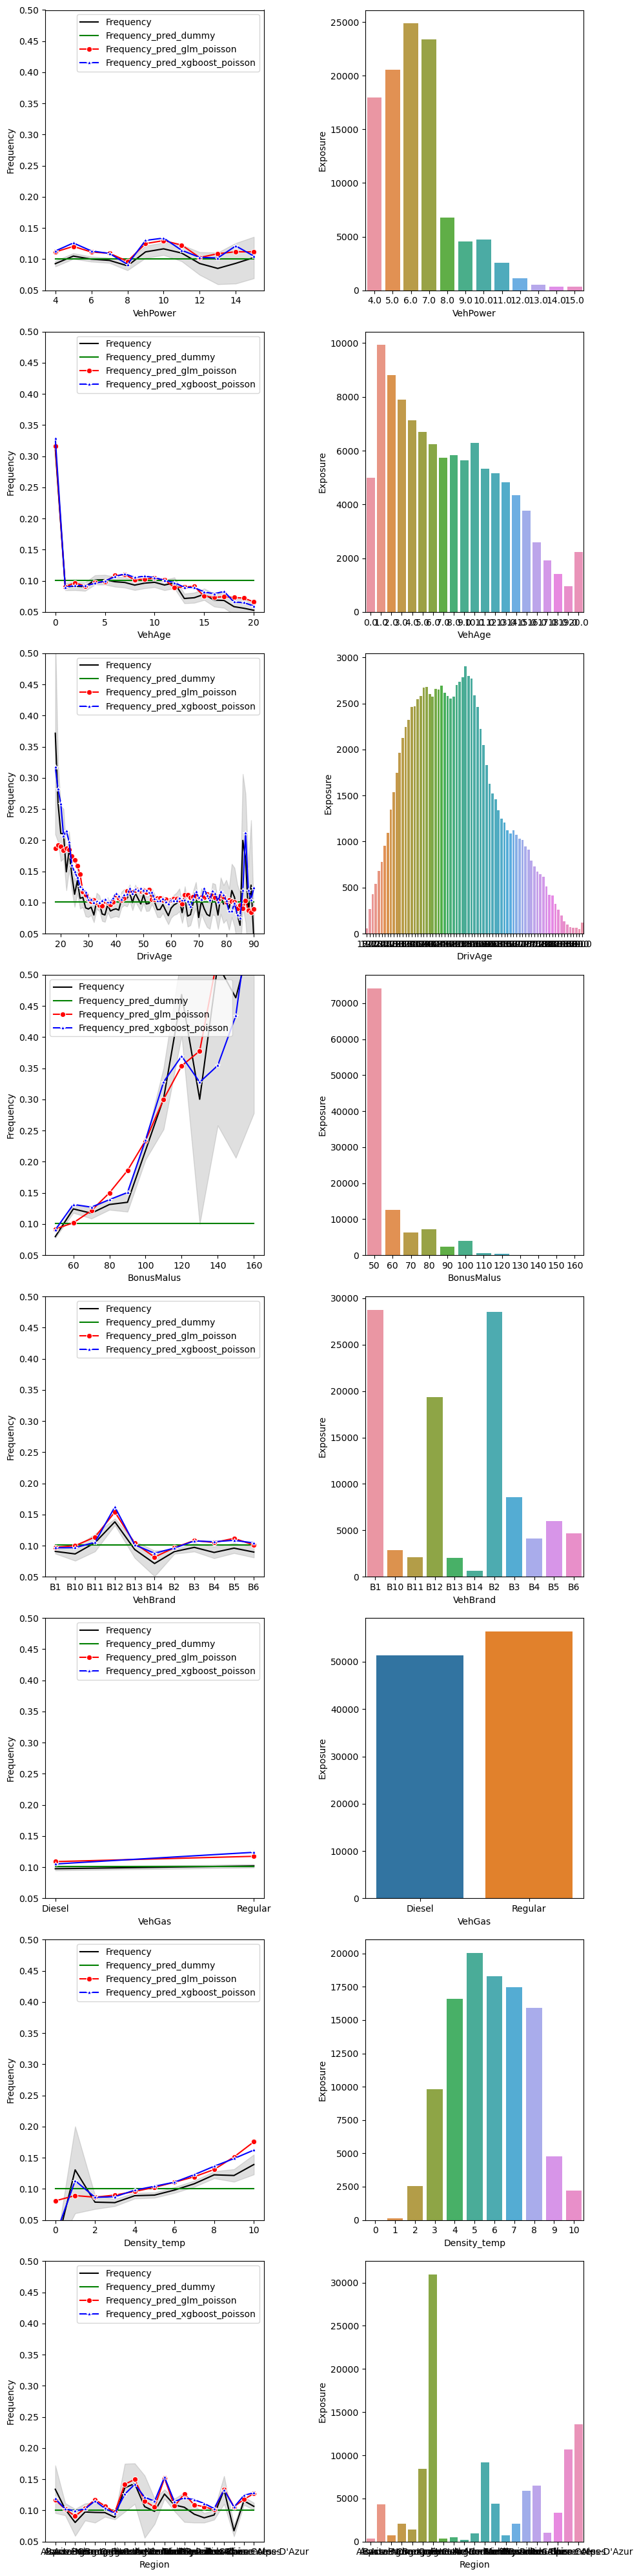

In [63]:
plotFrequenciesAndExposures(df_test_Freq, ['VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'VehBrand',
                 'VehGas', 'Density_temp', 'Region'], predictionValues = True)

Analyse der Plots bzgl. der prognostizierten, marginalen Schadenwahrscheinlichkeiten bzgl. den Merkmalen:
- bzgl. ``VehPower`` wird systematisch zu hoch von beiden Modellen prognostiziert
- bzgl. ``VehAge`` erfolgt eine relativ gute Abbildung, inkl. des Peaks für Neuwagen
- bzgl. ``DrivAge`` auch insgesamt gute Abbildung der Schadenhäufigkeit. XGBoost bildet bzgl. jungen Fahrern genauer ab als GLM.
- bzgl. ``BonusMalus`` können beide Modelle den starken Trend gut abbilden.
- bzgl. ``VehBrand``, ``VehGas``, ``Density``, ``Region`` wird systematisch zu hoch von beiden Modellen prognostiziert

Fazit:
Sowohl das GLM als auch das XGBoost-Modell können insgesamt die marginalen Schadenhäufigkeiten relativ gut abbilden. Bzgl. vieler Merkmale kommt es aber beiden Modellen zu systematisch zu hohen Prognosewerten - deshalb wird die Modellkalibrierung als nächstes untersucht werden.

### Trainieren der Modelle bzgl. Schadenaufwand

Die Modelle bzgl. Schadenaufwand werden auf Basis der Trainingsdaten bzgl. der Zielgröße ``ClaimAmountperClaimNb`` trainiert. Dabei dient das Merkmal ``ClaimNb`` als Gewichtungsfaktor.

In [64]:
# Fit des Dummy-Regressors bzgl. ClaimAmountperClaimNb
_ = dummy_ClaimAmountperClaimNb.fit(df_train_Claim, df_train_Claim["ClaimAmountperClaimNb"], sample_weight=df_train_Claim["ClaimNb"])

# Fit des GLM bzgl. ClaimAmountperClaimNb
_ = glm_gamma.fit(df_train_Claim, df_train_Claim["ClaimAmountperClaimNb"], regressor__sample_weight=df_train_Claim["ClaimNb"])

# Fit des XGBoost-Modell bzgl. ClaimAmountperClaimNb
_ = xgboost_gamma.fit(df_train_Claim, df_train_Claim["ClaimAmountperClaimNb"], regressor__sample_weight=df_train_Claim["ClaimNb"])

<a id='Prognose-und-Scoring-des-Schadenaufwands-bzgl-Trainings-und-Testdaten'></a>
### Prognose und Scoring des Schadenaufwands bzgl. Trainings- und Testdaten

Prognose und Scoring der Schadenaufwand bzgl. der Trainings- und Testdaten für das jeweilige Modell

In [65]:
#Prognose und Scoring bzgl. Dummy-Regressor
predictAndSaveResults('dummy', dummy_ClaimAmountperClaimNb, 'ClaimAmountperClaimNb')

#Prognose und Scoring bzgl. GLM
predictAndSaveResults('glm_gamma', glm_gamma, 'ClaimAmountperClaimNb')

#Prognose und Scoring bzgl. XGBoost
predictAndSaveResults('xgboost_gamma', xgboost_gamma, 'ClaimAmountperClaimNb')

Model_Metric_Data_Target  Value of Metric
0          dummy_meanGammaDeviance_df_train_Claim           1.7672
1           dummy_meanGammaDeviance_df_test_Claim           1.5662
2      glm_gamma_meanGammaDeviance_df_train_Claim           1.5107
3       glm_gamma_meanGammaDeviance_df_test_Claim           1.6281
4  xgboost_gamma_meanGammaDeviance_df_train_Claim           1.2977
5   xgboost_gamma_meanGammaDeviance_df_test_Claim           1.6480

Analyse der Scoringergebnisse:

Das GLM und XGBoost-Modell schneiden bzgl. der Trainingsdaten deutlich besser ab als bzgl. der Testdaten. Dagegen schneidet das Dummy-Regressor-Modell bzgl. aller Modelle am Schlechtesten bzgl. der Trainings- und am Besten bzgl. der Testdaten ab. Das deutet stark darauf hin, dass die beiden anderen Modelle auf Basis der Trainingsdaten überangepasst sind und nur das Rauschen in den Trainingsdaten abgebildet haben. Die Modelle bringen somit keinen Mehrwert ggü. dem Dummy-Regressor-Modell. Generell erscheint es aber als schwierig ein Mehrwert bringendes Modell für die stark verrauschten Schadensaufwands-Daten zu finden.

<a id='Prognostizierte-marginale-Schadenaufwände-bzgl-Merkmalen'></a>
### Prognostizierte marginale Schadenaufwände bzgl. Merkmalen

Plotten der vom jeweiligen Modell prognostizierten marginalen Schadenaufwände bzgl. den Merkmalen. Zudem Darstellung ggü. den marginalen Schadenaufwänden und ggü. dem Schadenaufwand für das gesamte Portfolio.

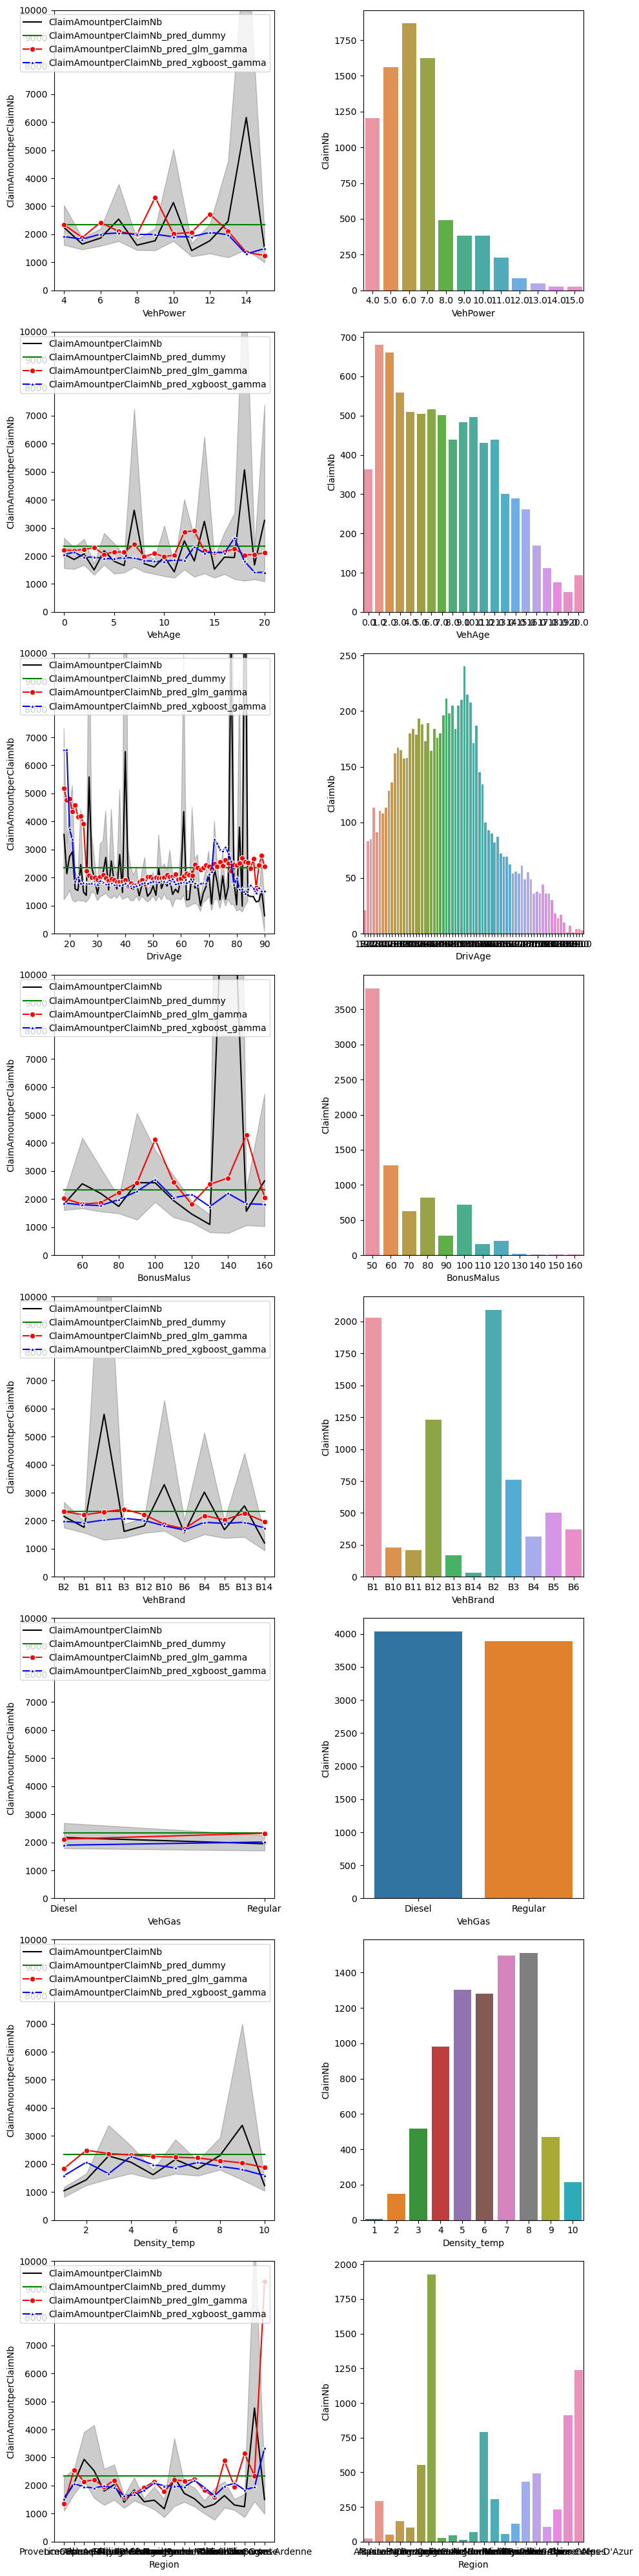

In [66]:
plotClaimAmountperClaimNb(df_test_Claim, ['VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'VehBrand',
                 'VehGas', 'Density_temp', 'Region'], predictionValues = True)

Analyse der Plots bzgl. der prognostizierten, marginalen Schadenaufwände bzgl. der Merkmale:

Sowohl das GLM als auch das XGBoost-Modell können insgesamt die Verläufe der marginalen Schadenaufwände nicht gut abbilden. Das steht im Einklang mit der voran gegangen Erkenntnis aus der Scoringergebnisanalyse: Die Modelle bringen, in der Konfiguration und bzgl. der vorliegenden Daten, keinen Mehrwert in der Prognose ggü. einer einfachen Prognose des durchschnittlichen Schadenaufwands im Portfolio.

<a id='Modellkalibrierung-bzgl-Schadenwahrscheinlichkeit-untersuchen'></a>
# Modellkalibrierung bzgl. Schadenwahrscheinlichkeit untersuchen

Nun soll untersucht werden, wie gut das jeweilige Modell kalibriert ist, d.h. ob es z.B. eine systematische Abweichung der prognostizierten Zielgröße Schadenwahrscheinlichkeit nach oben oder unten gibt im Vergleich zur gemessenen Schadenhäufigkeit. Dazu werden die prognostizierten Schadenwahrscheinlichkeiten der Reihenfolge nach angeordnet und in Gruppen mit gleicher Intervalllänge unterteilt. Bzgl. jeder Gruppe wird dann der Mittelwert der prognostizierten und der gemessenen Werte berechnet und visuell gegenüber gestellt.

Dazu wird Code mit definierter Funktion diesbzgl. aus [4] übernommen und angepasst:

Anzahl gemessener Schäden in Testdaten: 10771.0
Prognostizierte Anzahl an Schäden dummy_Frequency: 10861.0
Prognostizierte Anzahl an Schäden glm_poisson: 10850.8
Prognostizierte Anzahl an Schäden xgboost_poisson: 10895.4


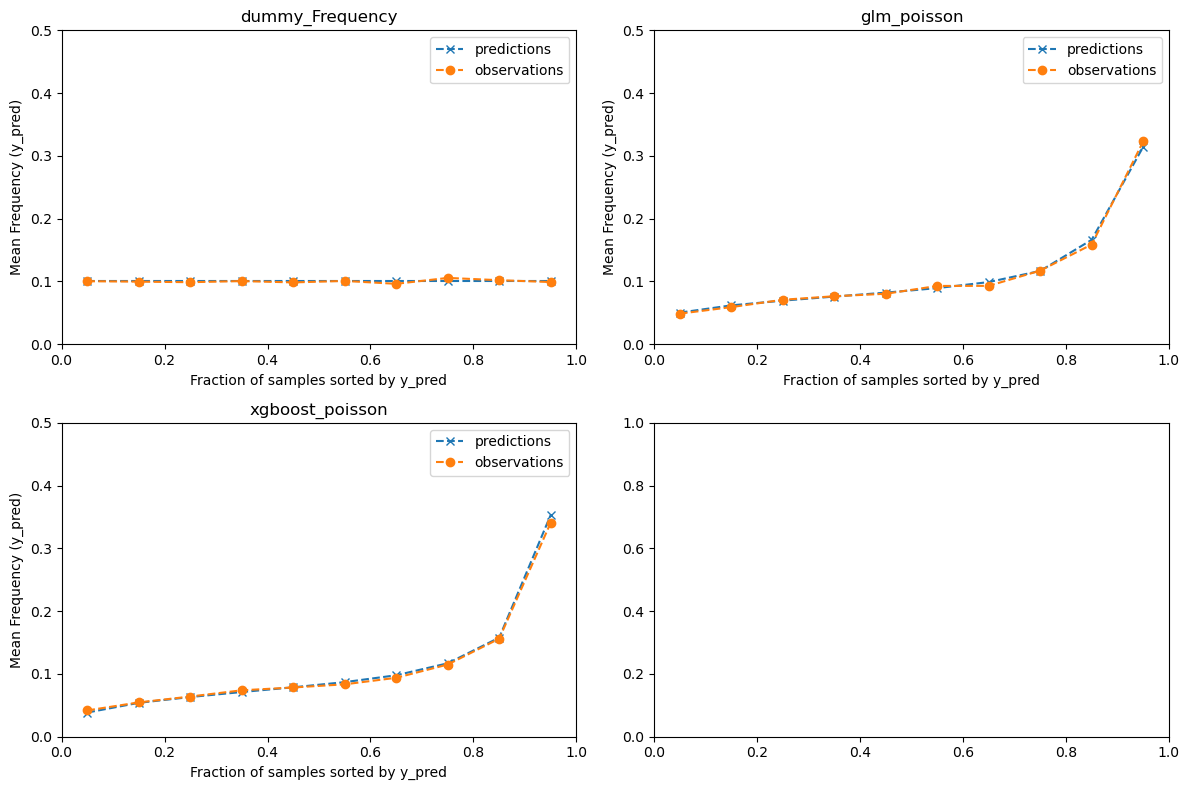

In [67]:
def _mean_frequency_by_risk_group(y_true, y_pred, sample_weight=None, n_bins=100):
    """Compare predictions and observations for bins ordered by y_pred.

    We order the samples by ``y_pred`` and split it in bins.
    In each bin the observed mean is compared with the predicted mean.

    Parameters
    ----------
    y_true: array-like of shape (n_samples,)
        Ground truth (correct) target values.
    y_pred: array-like of shape (n_samples,)
        Estimated target values.
    sample_weight : array-like of shape (n_samples,)
        Sample weights.
    n_bins: int
        Number of bins to use.

    Returns
    -------
    bin_centers: ndarray of shape (n_bins,)
        bin centers
    y_true_bin: ndarray of shape (n_bins,)
        average y_pred for each bin
    y_pred_bin: ndarray of shape (n_bins,)
        average y_pred for each bin
    """
    idx_sort = np.argsort(y_pred)
    bin_centers = np.arange(0, 1, 1 / n_bins) + 0.5 / n_bins
    y_pred_bin = np.zeros(n_bins)
    y_true_bin = np.zeros(n_bins)

    for n, sl in enumerate(gen_even_slices(len(y_true), n_bins)):
        weights = sample_weight[idx_sort][sl]
        y_pred_bin[n] = np.average(y_pred[idx_sort][sl], weights=weights)
        y_true_bin[n] = np.average(y_true[idx_sort][sl], weights=weights)
    return bin_centers, y_true_bin, y_pred_bin


print(f"Anzahl gemessener Schäden in Testdaten: {df_test_Freq['ClaimNb'].sum()}")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.3)

#Definiere Modelle und Modellnamen in Liste:
models = [dummy_Frequency, glm_poisson, xgboost_poisson]
modelnames = ['dummy_Frequency', 'glm_poisson', 'xgboost_poisson']

for axi, model, modelname in zip(ax.ravel(), models, modelnames):
    y_pred = model.predict(df_test_Freq)
    y_true = df_test_Freq["Frequency"].values
    exposure = df_test_Freq["Exposure"].values
    q, y_true_seg, y_pred_seg = _mean_frequency_by_risk_group(
        y_true, y_pred, sample_weight=exposure, n_bins=10
    )

    # Name of the model after the estimator used in the last step of the
    # pipeline.
    print(f"Prognostizierte Anzahl an Schäden {modelname}: {np.sum(y_pred * exposure):.1f}")

    axi.plot(q, y_pred_seg, marker="x", linestyle="--", label="predictions")
    axi.plot(q, y_true_seg, marker="o", linestyle="--", label="observations")
    axi.set_xlim(0, 1.0)
    axi.set_ylim(0, 0.5)
    axi.set(
        title=modelname,
        xlabel="Fraction of samples sorted by y_pred",
        ylabel="Mean Frequency (y_pred)",
    )
    axi.legend()
plt.tight_layout()

Fazit:
- Alle 3 Modelle sehen gut kalibriert aus anhand ihrer Plots
- Alle 3 Modelle überschätzen aber leicht die Anzahl der tatsächlich gemessenen Schäden bzgl. der gesamten Testdaten (s. Werte über Plots) - das ist aber auf den etwas höheren gewichteten Portfolio-Mittelwert der Trainingsdaten ggü. den Testdaten zurück zu führen.
- dagegen war in der Einzelbetrachtung, anhand der Plots bzgl. der Schadenwahrscheinlichkeit, bzgl. einiger Merkmale eine systematisch höhere Prognose der marginalen Schadenwahrscheinlichkeit ggü. der gemessenen Schadenhäufigkeit zu erkennen.

# Zu verwendendes Modell für Schadenaufwand

Auf Basis der Erkenntnisse aus der voran gegangenen Modell-Evaluierung wird folgendes Modell für die Ermittlung des Schadenbedarfs empfohlen:
- Schadenbedarf soll sich als Produkt aus prognostizierter Schadenwahrscheinlichkeit und Schadenaufwand pro Schadenfall ergeben
- Als Modell für Prognose der Schadenwahrscheinlichkeit wird das XGBoost-Modell und als Modell für Prognose des Schadenaufwands wird das Dummy-Regressor Modell empfohlen.

Begründung:
- auf Basis der Testdaten weist XGBoost-Modell bzgl. Schadenwahrscheinlichkeit das beste Scoring auf und ist bzgl. Prognose der marginalen Schadenwahrscheinlichkeit und bzgl. der Modellkalibrierung sehr ähnlich zum GLM-Modell
- auf Basis der Testdaten weist Dummy-Regressor bzgl. Schadenaufwand das beste Scoring auf und ist bzgl. Prognose der marginalen Schadenwahrscheinlichkeit und bzgl. der Modellkalibrierung nicht schlechter als die anderen Modelle

<a id='Bestimmung-der-wichtigsten-Merkmale-für-den-Schadenbedarf'></a>
# Bestimmung der wichtigsten Merkmale für den Schadenbedarf

In den nachfolgenden Abschnitten wird der Frage nach den wichtigsten Merkmalen für den Schadenbedarf nachgegangen.
Dabei wird auch auf Erkenntnisse aus bereits voran gegangener Analysen zurück gegriffen, insbesondere der bereits erfolgten visuellen Analyse der marginalen Schadenwahrscheinlichkeiten.

### Bestimmung der wichtigsten Merkmale bzgl. Schadenwahrscheinlichkeit mit XGBoost

Die Bibiliothek des XGBoost-Regressors bietet direkt eine Einwertung der Wichtigkeit der Merkmale bzgl. des voran gegangenen Trainingsprozesses an. Die Rangfolge der Merkmale beruht dabei auf dem Einfluss, den das Merkmal beim Modell-Training auf die Reduzierung des Wertes der Kostenfunktion ausgeübt hat.

Text(0.5, 0, 'XGBoost Feature Importance')

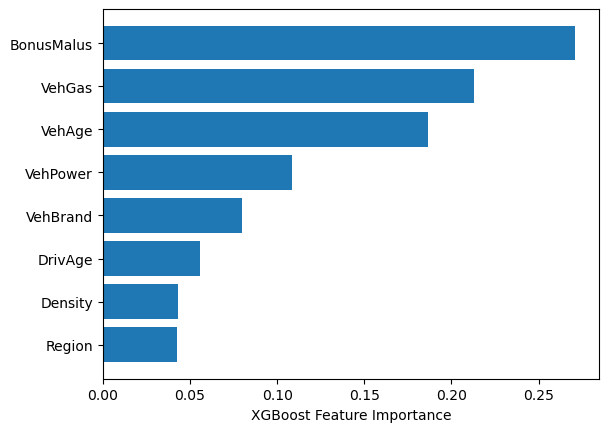

In [68]:
featureNames = np.array(['BonusMalus', 'Density', 'VehAge', 'DrivAge', 'VehBrand', 'VehPower', 'VehGas', 'Region'])
sorted_idx = xgboost_poisson[1].feature_importances_.argsort()
plt.barh(featureNames[sorted_idx], xgboost_poisson[1].feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")

Die Rangfolge in der Wichtigkeit der Merkmale gemäß XGBoost Feature Importance Metrik ist interessant:
- ``BonusMalus`` ist das wichtigste Kriterium gemäß XGBoost Feature Importance Metrik. Da der hohe marginale Einfluss auf Schadenwahrscheinlichkeit bereits zuvor schon erkannt worden ist, ist das nicht überraschend
- ``VehGas`` ist 2. wichtigste Kriterium, was überraschend ist, da der Einfluss auf die marginale Schadenwahrscheinlichkeit eher gering ist. Vermutlich spielt hier ein komplizierter Zusammenhang zwischen den Merkmalen und der Zielgröße im Datensatz eine Rolle.
- ``VehAge`` ist 3. wichtigste Kriterium. Der Einfluss auf die marginale Schadenwahrscheinlichkeit ist gut sichtbar. Bzgl. Neuwagen liegt die Schadenhäufigkeit bei über 30%. Auch hier spielt vermutlich ein komplizierter Zusammenhang zwischen den Merkmalen und der Zielgröße im Datensatz eine Rolle.
- ``VehPower`` ist 4. wichtigste Kriterium. Der Einfluss auf die marginale Schadenwahrscheinlichkeit ist nicht monoton.
- ``VehBrand`` ist 5. wichtigste Kriterium. Da der Einfluss auf die marginale Schadenwahrscheinlichkeit bzgl. Automarke 'B12' relativ groß ist, und bzgl. dieser Automarke auch ein relativ großes Exposure vorliegt, liegt auch hier vermutlich ein komplizierter Zusammenhang zwischen den Merkmalen und der Zielgröße vor.
- bzgl. ``DrivAge`` und ``Density`` ist überraschend, dass sie als nicht so wichtige Kriterien gewertet werden, obwohl der Einfluss auf die marginale Schadenwahrscheinlichkeit sichtbar ist.

<a id='Entscheidungsbaum-zwecks-Ermittlung-wichtigster-Merkmale-und-komplizierterer-Zusammenhänge-in-den-Daten'></a>
## Entscheidungsbaum zwecks Ermittlung wichtigster Merkmale und komplizierterer Zusammenhänge in den Daten

Auf Basis der Erkenntnisse bzgl. der Wichtigkeit der Merkmale für das XGBoost-Modell werden kompliziertere Zusammenhänge in den Daten bzgl. den Merkmalen und der Zielgröße Schadenwahrscheinlichkeit vermutet - beispielsweise bzgl. ``VehGas``. Um diesen  auf die Spur zu kommen, wird im folgenden ein kurzer Entscheidungsbaum gebaut und visualisiert. Die Idee dahinter ist, dass evtl. verborgene Zusammenhänge zwischen diesen Merkmalen und der Zielgröße sichtbar werden könnten. Da das gewählte XGBoost-Modell ebenfalls Entscheidungsbaum basiert ist, könnte das die durch das XGBoost-Modell ermittelte Wichtigkeit der Merkmale besser nachvollziehbar machen.

Definition des Entscheidungsbaums auf Basis der gesamten Daten ``df_prep``:
- kategorische Variablen können gemäß skicit-learn API nicht verwendet werden und werden deshalb one-hot-codiert
- als Baumtiefe wird 3 gewählt, da so zum einen der Baum übersichtlich in der Darstellung bleibt und zum Anderen die wichtigeren Merkmale eher in den oberen Ebenen auftauchen sollten

In [69]:
# Definition des Daten-Preprocessors
decisonTree_preprocessor = ColumnTransformer(
    [
        ("passthrough_numeric", "passthrough", ["BonusMalus", "Density", "VehAge", "DrivAge", "VehPower"]),
        ("onehot_categorical", OneHotEncoder(), ["VehBrand", "VehGas", "Region"])
    ],
    remainder="drop"
)

# Definition der Pipeline
decisonTree = Pipeline(
    [
        ("preprocessor", decisonTree_preprocessor),
        ("regressor", DecisionTreeRegressor(max_depth=3, criterion='poisson'))
    ]
)

# Fit des decisonTree-Modell bzgl. Frequency
_ = decisonTree.fit(df_prep, df_prep["Frequency"], regressor__sample_weight=df_prep["Exposure"])

In [70]:
# Zuordnung der one-hot-codierten Merkmals-Werte zu den Merkmalen
categories_array = list(decisonTree['preprocessor'].transformers_[1][1].categories_)
categories=["BonusMalus", "Density", "VehAge", "DrivAge", "VehPower"]
for category in categories_array:
    for value in list(category):
        categories.append(value)
        
assert len(categories) == (5 * 1 + df_prep.VehBrand.nunique() + df_prep.VehGas.nunique()
                           + df_prep.Region.nunique()), 'Länge der Liste inkonsistent!'

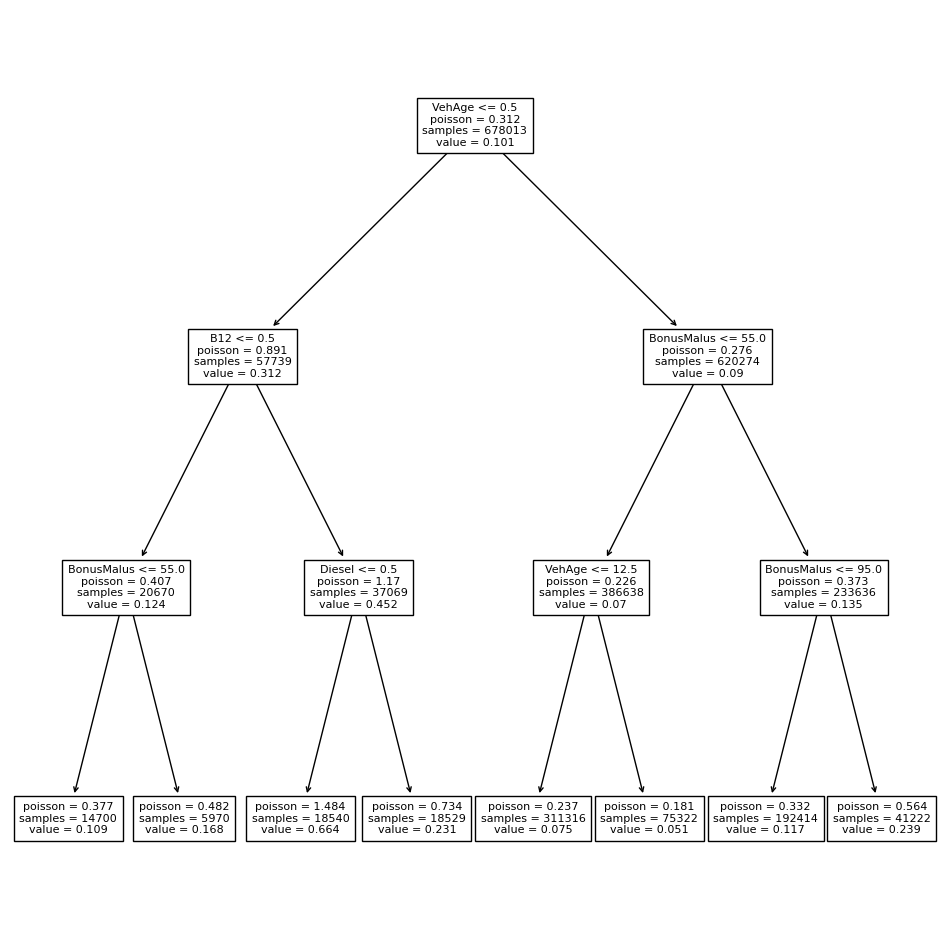

In [71]:
# plot tree
plt.figure(figsize=(12,12))
_ = plot_tree(decisonTree[1], feature_names=categories, fontsize=8)

Analyse des Entscheidungsbaums:
- ``VehAge``, ``VehBrand``, ``BonusMalus`` und ``VehGas`` tauchen auf den ersten 3 Ebenen auf und sind somit relativ wichtig für die Verringerung der Poisson-Kostenfunktion. Das steht relativ gut im Einklang mit der ermittelten Rangfolge der Merkmale bzgl. der Wichtigkeit für das XGBoost-Modell.
- interessant ist der kompliziertere Zusammenhang: Für Neuwagen der Automarke B12 mit normalem Kraftstoff wird sehr hohe Schadenwahrscheinlichkeit von ~66 % prognostiziert. Dabei scheint es sich um eine spezielle Hochrisiko-Gruppe von 18540 Verträgen zu handeln, die sich deutlich anders als die Gruppe der Durchschnittsversicherten verhält. Z.B. könnte es sich um die Fahrzeugflotte eines Mietwagen-Verleihs handeln - dafür spricht z.B. der hohe Anteil an relativ neuen Wagen der Automarke B12 gemäß erfolgter mulitvariater Analyse. Hier wäre ein weiteres Identifizierungsmerkmal für diese Gruppe wünschenswert.
- den Gegensatz dazu bildet die Gruppe der Fahrer mit einem geringen BonusMalus-Score und einem hohen Fahrzeugalter: hier wird eine deutlich unterdurchschnittliche Schadenwahrscheinlichkeit von ~5 % erwartet. Das deckt sich auch mit den bzgl. beider Merkmale ermittelten marginalen Schadenwahrscheinlichkeitsprofilen.

## Fazit bzgl. wichtigster Merkmale

Aus den voran gegangen Analysen bzgl. der wichtigsten Merkmale lässt sich schlussfolgern:
- Die Variablen Fahrzeugalter ``VehAge``, Fahrzeugmarke ``VehBrand``, Fahrer-Score ``BonusMalus`` und Kraftstoff ``VehGas`` spielen eine wichtige Rolle bzgl. der Vorhersage der Schadenwahrscheinlichkeit und damit auch für den finalen Schadenbedarf (der Schadenaufwand pro Schadensfall wird ja als unabhängig von den Risikomerkmalen angenommen).
- aber es drängt sich die Vermutung auf, dass dabei die Wichtigkeit von Fahrzeugmarke ``VehBrand`` und Kraftstoff ``VehGas`` deutlich überschätzt wird, da hier vermutlich die spezielle Hochrisiko-Gruppe "Neuwagen der Automarke B12 mit normalem Kraftstoff" einen großen Einfluss hat - dies könnte noch weiter untersucht werden, z.B. durch Berücksichtigung eines zusätzlichen synthetischen Merkmals aus diesen 3 Merkmalen, welches dann diese Gruppe kennzeichnet.
- Für die Wichtigkeit der Merkmale Fahrer-Score ``BonusMalus`` und Fahrzeugalter ``VehAge`` auf den finalen Schadenbedarf gibt es dagegen mehrere Indizien: Beide Merkmale haben ein trendförmiges marginales Schadenwahrscheinlichkeitsprofil und beide werden auch von den baumbasierten Verfahren als wichtige Merkmale zur Reduzierung der Kostenfunktion berücksichtigt.